<a href="https://colab.research.google.com/github/VarshaSriVattikonda/Python/blob/master/heartdiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
!pip install sweetviz
import sweetviz as sv
import time

# Scikit-Learn Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Warnings
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 37.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
Data = pd.read_csv("/content/Heart_Disease_Dataset.csv")

In [5]:
Data.shape

(1025, 14)

In [6]:
Data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [7]:
Data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
Data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
Data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

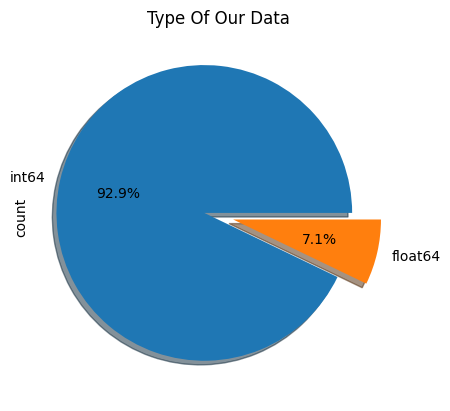

In [10]:
Data.dtypes.value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.1f%%", shadow=True)
plt.title("Type Of Our Data");

In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
Data.describe().style.background_gradient(cmap="Blues")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.000000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.592510,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


                                             |          | [  0%]   00:00 -> (? left)


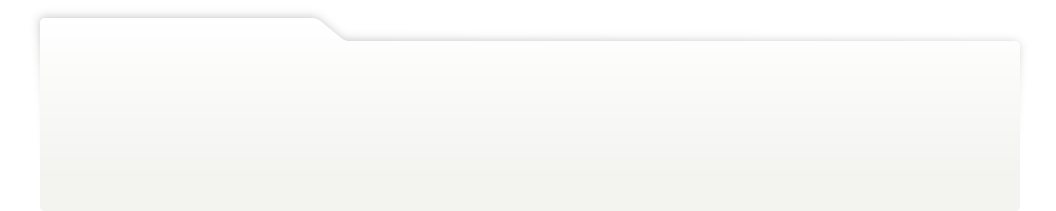
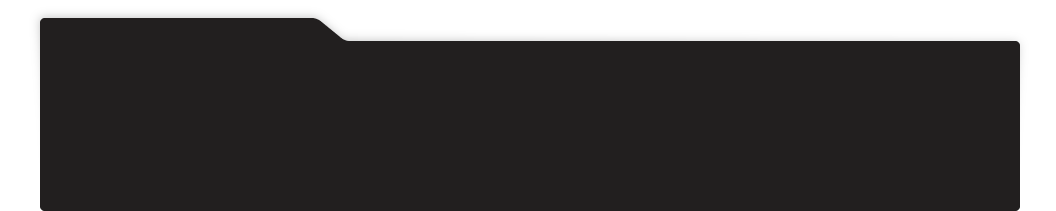
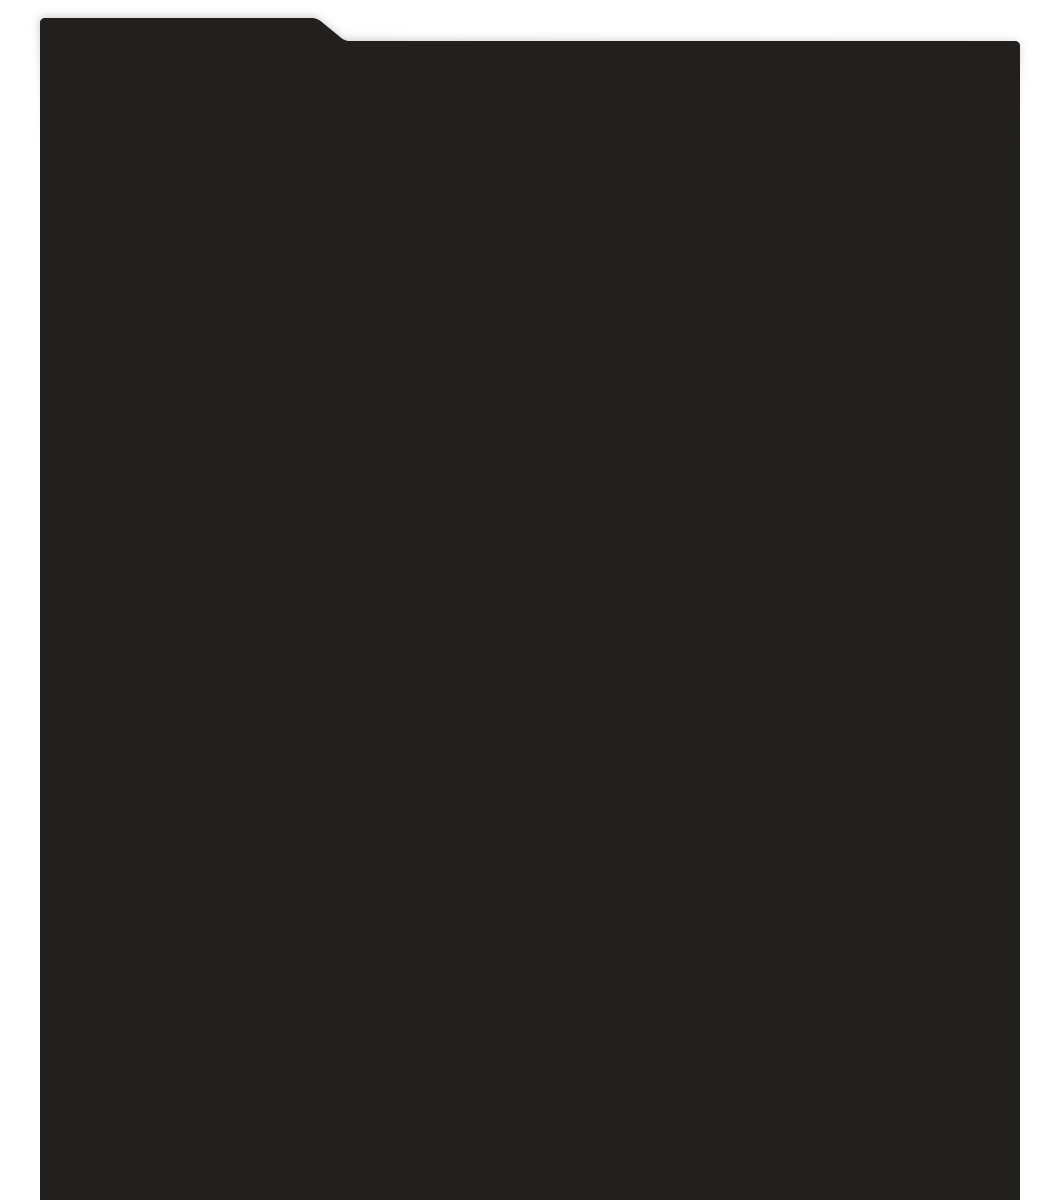
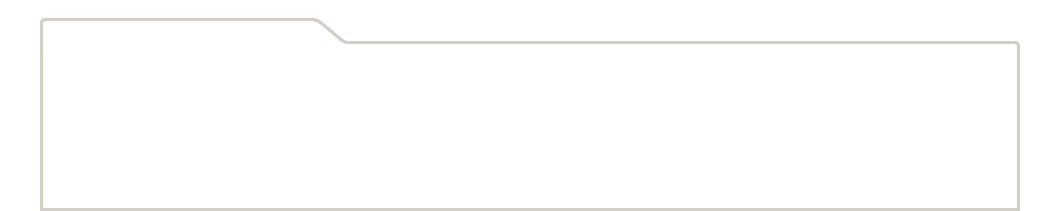
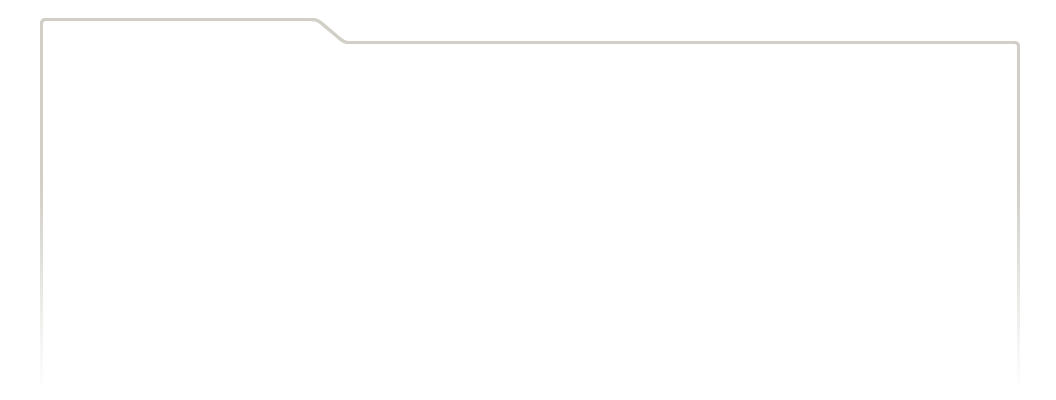
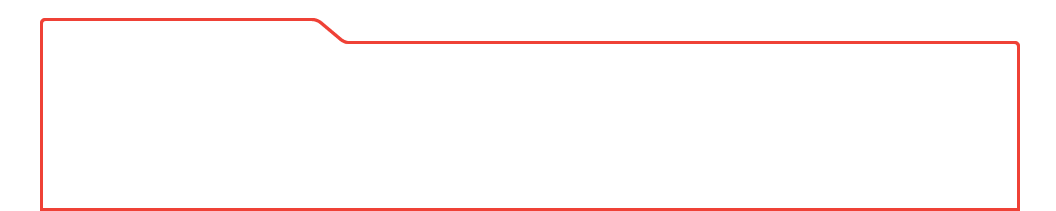
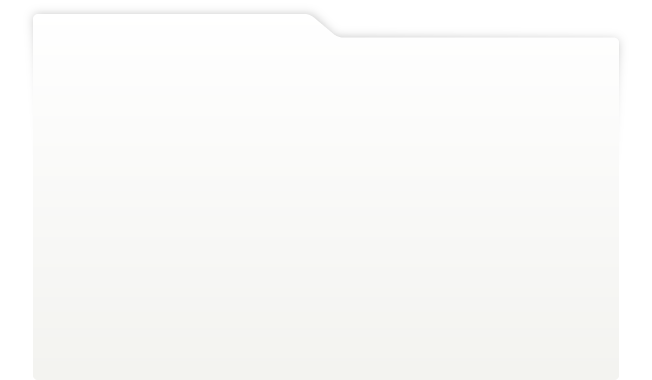
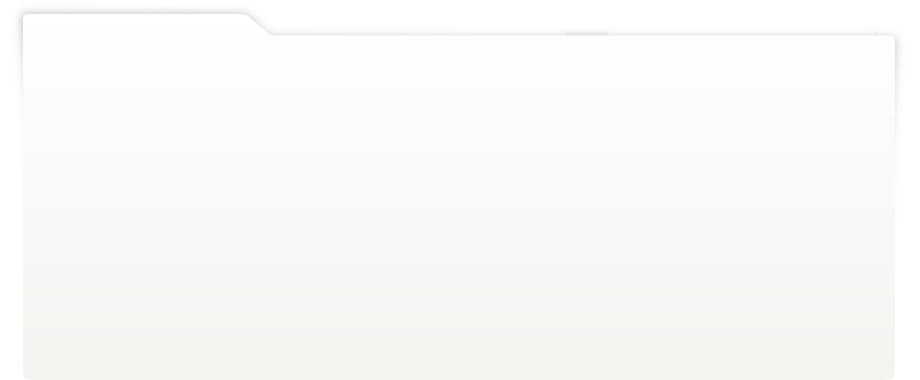
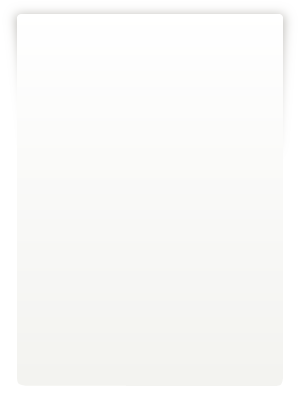
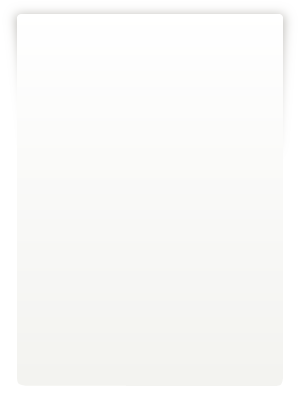
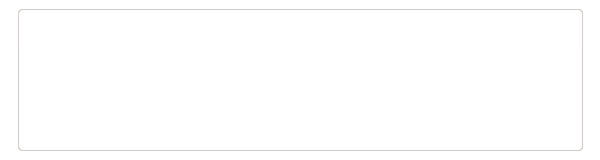
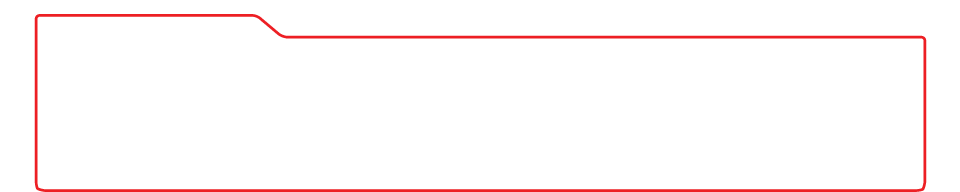
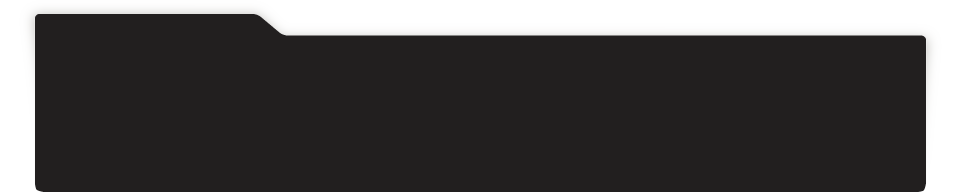
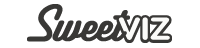
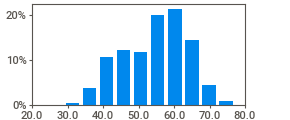
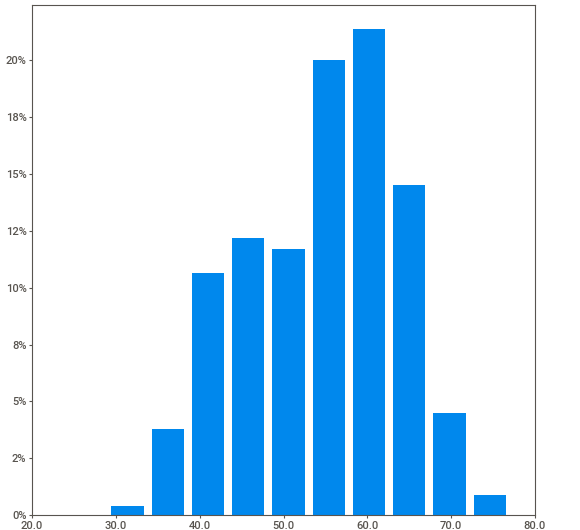
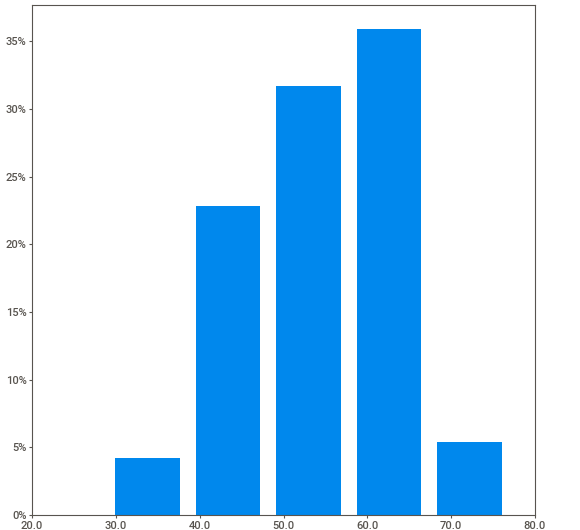
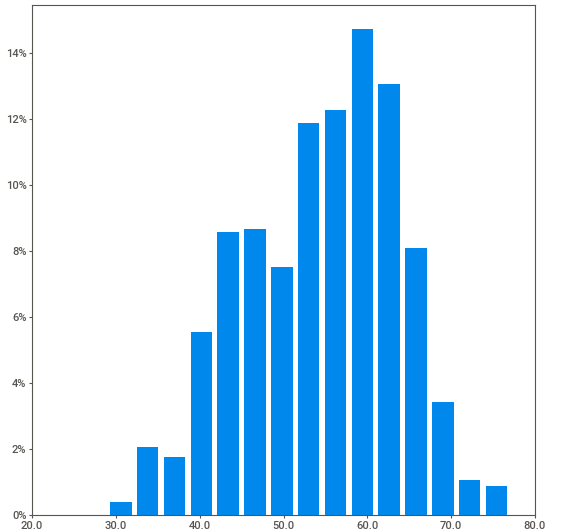
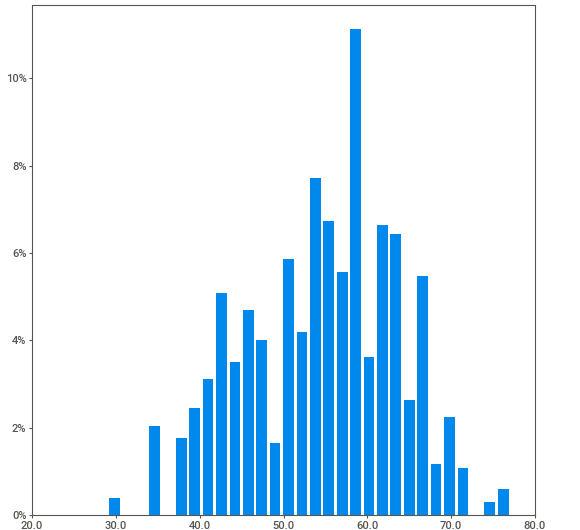
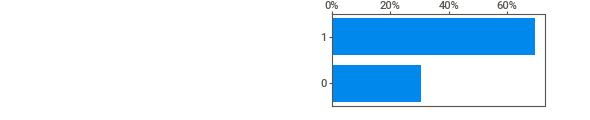
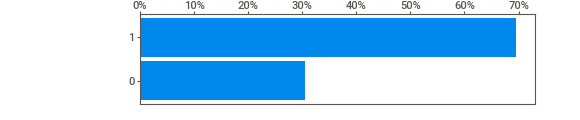
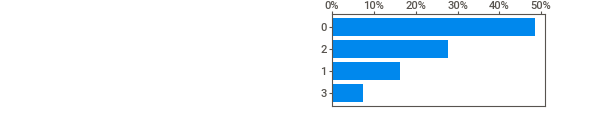
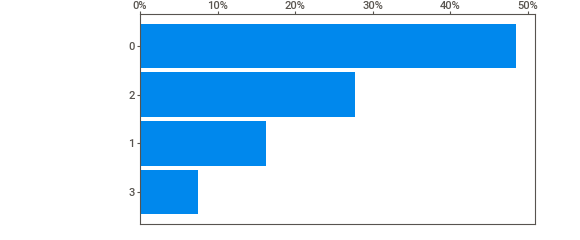
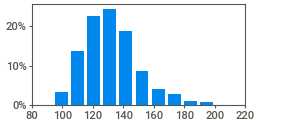
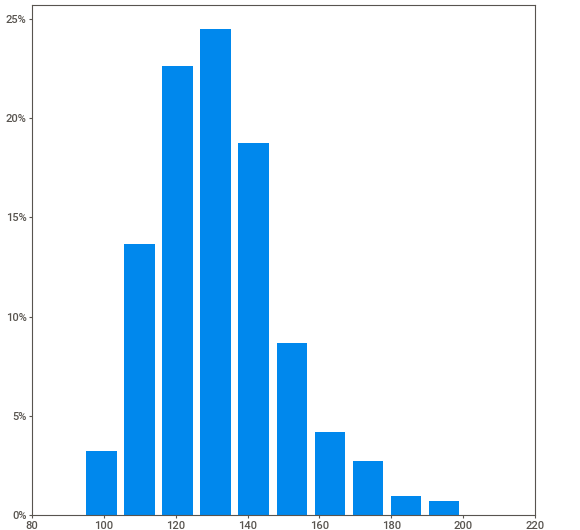
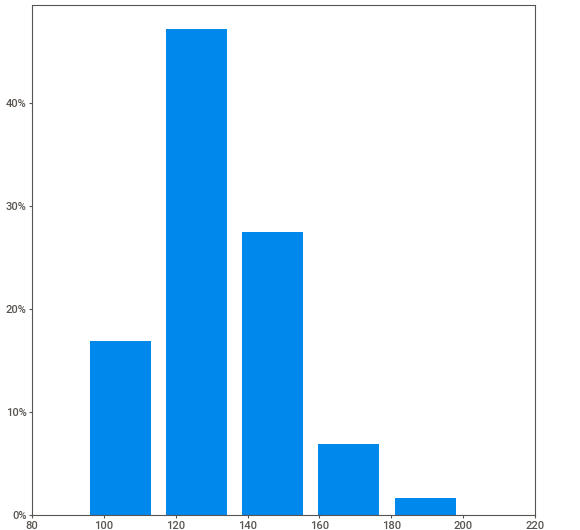
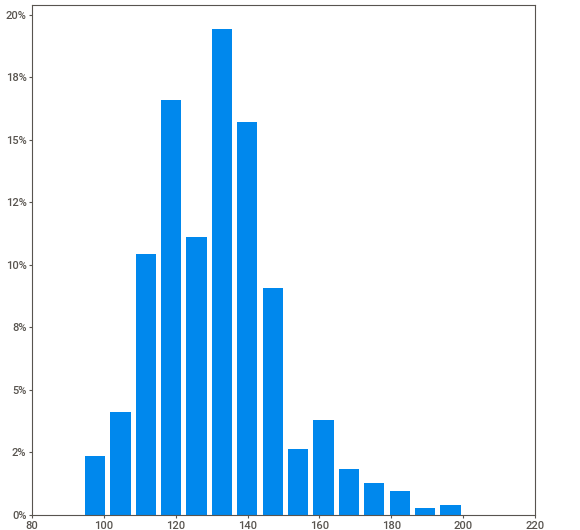
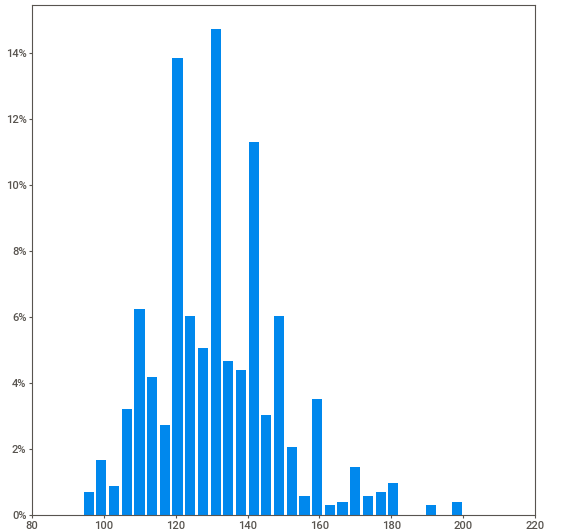
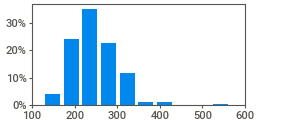
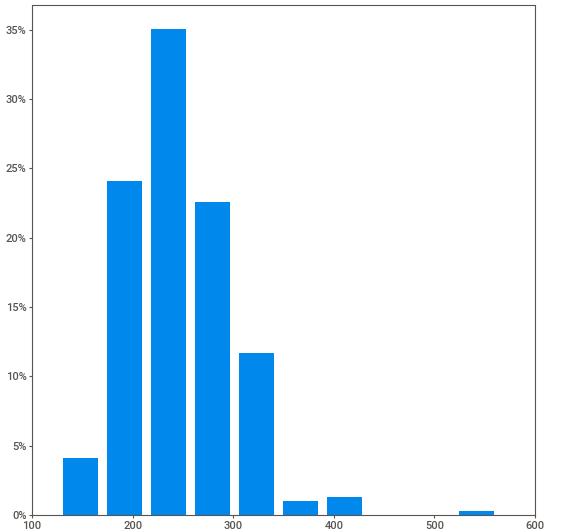
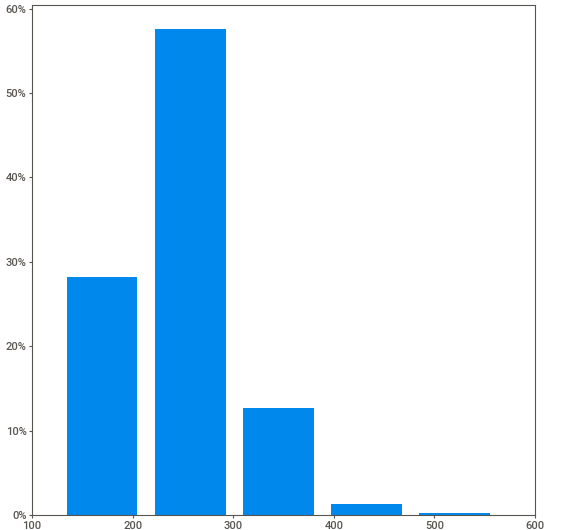
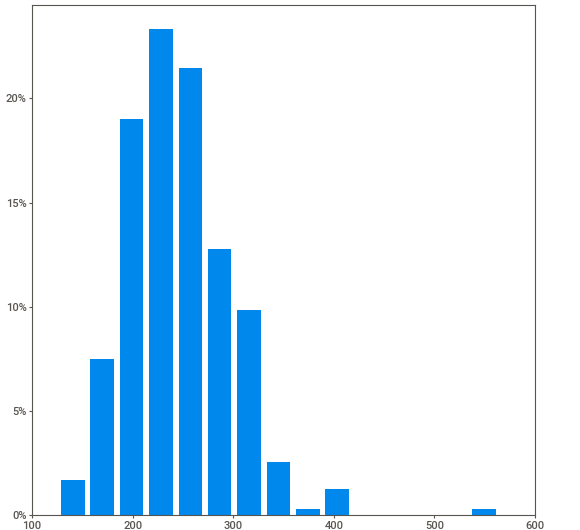
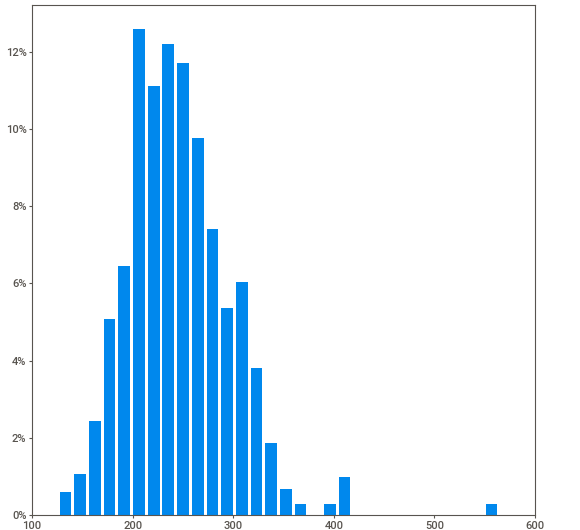
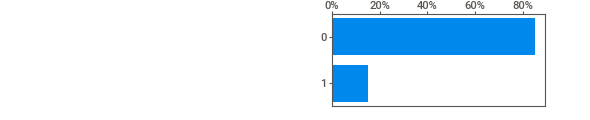
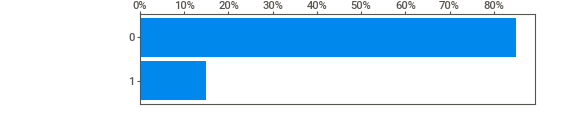
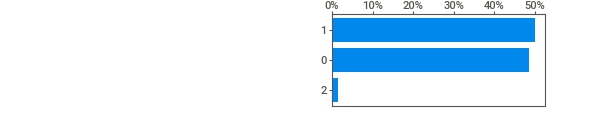
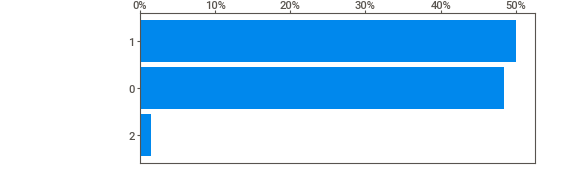
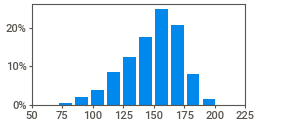
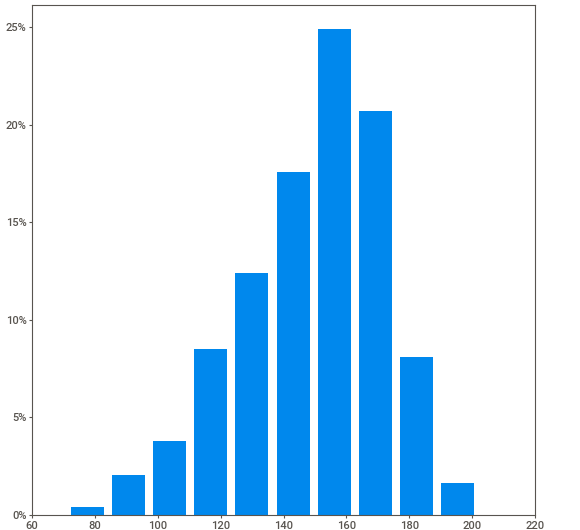
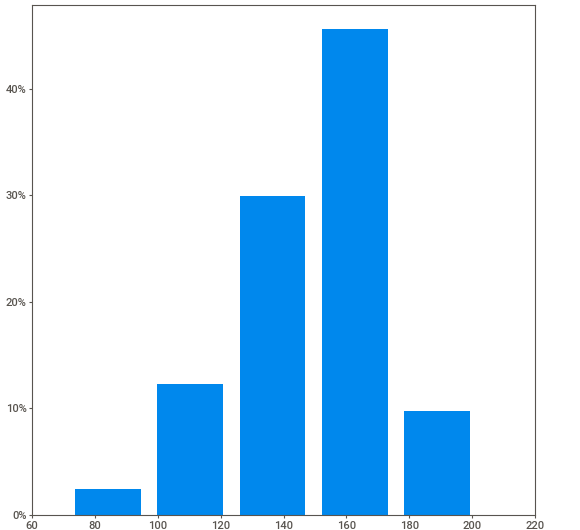
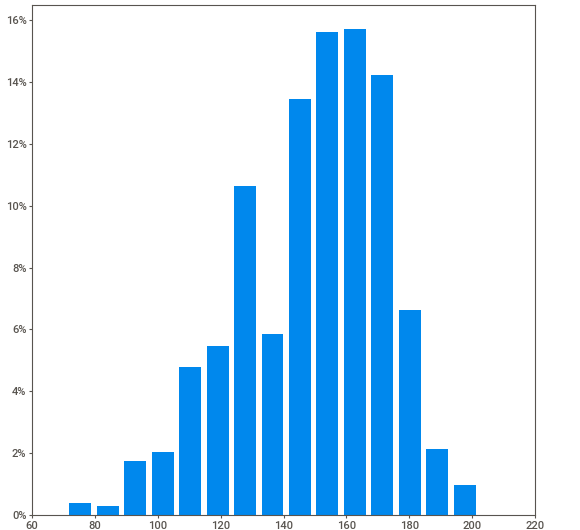
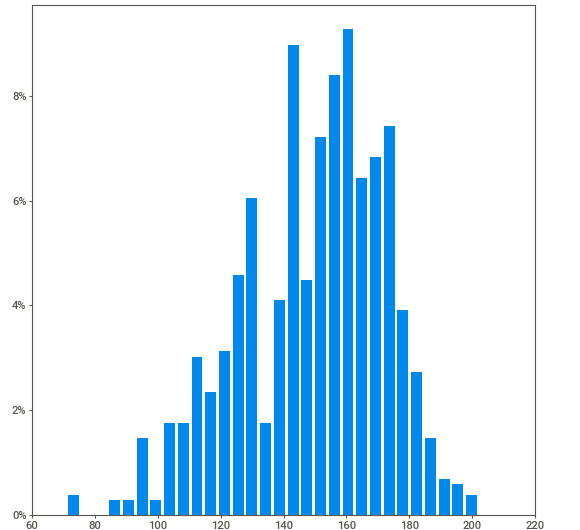
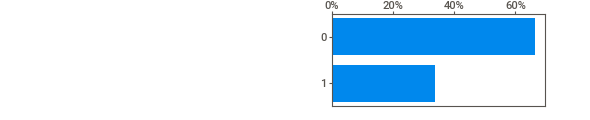
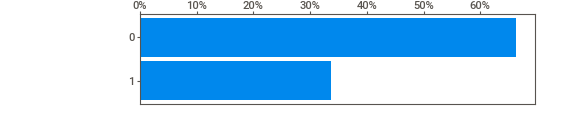
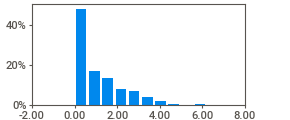
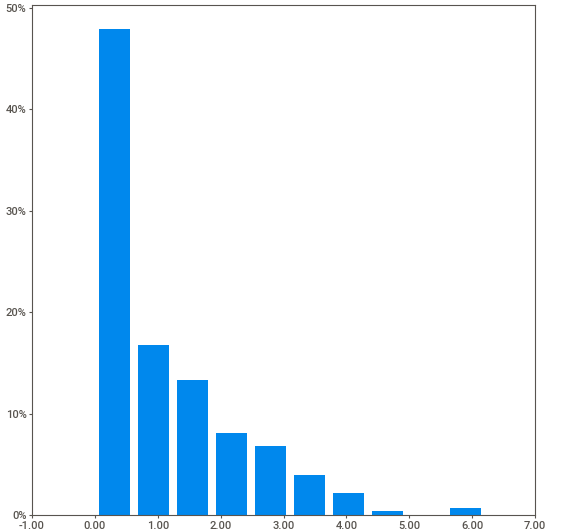
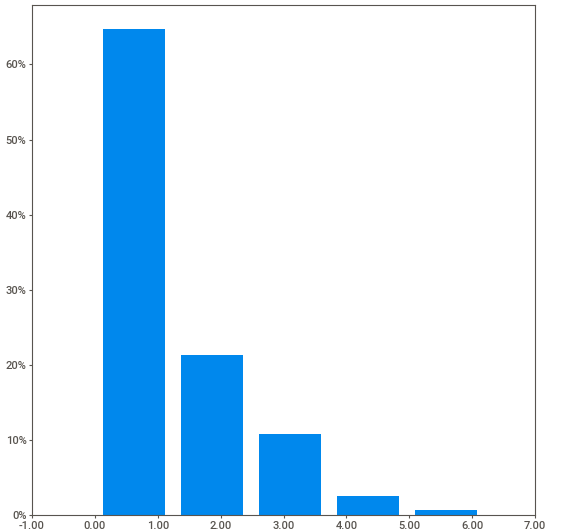
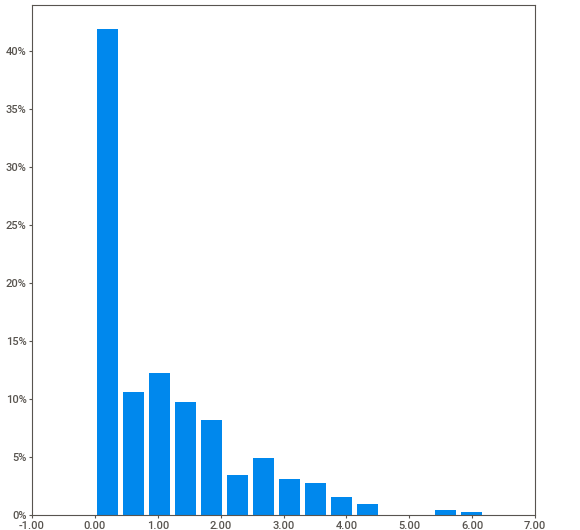
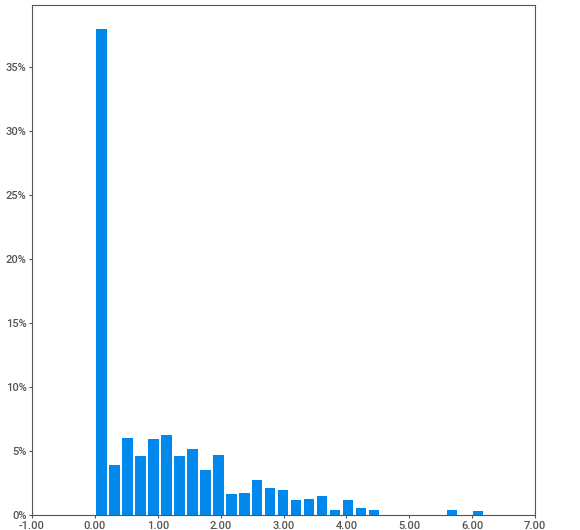
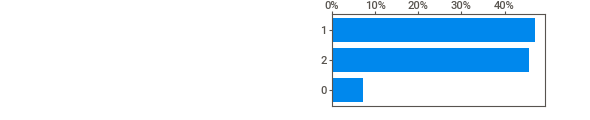
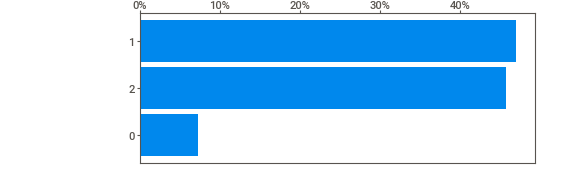
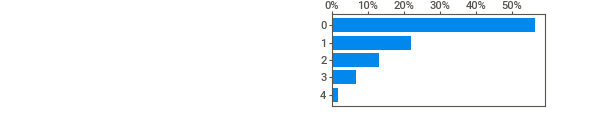
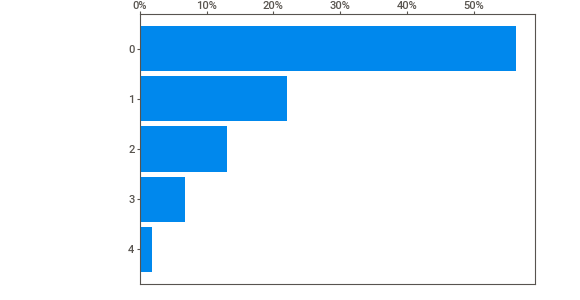
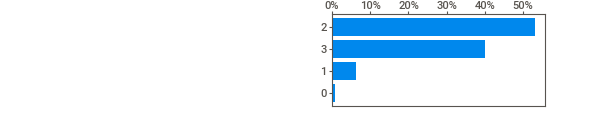
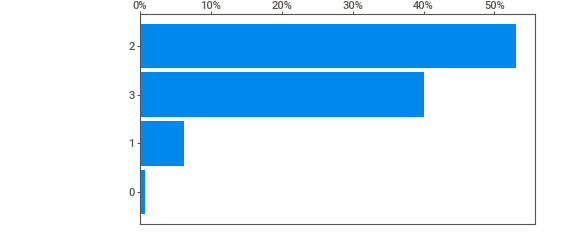
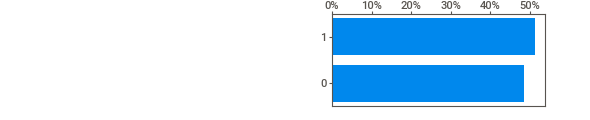
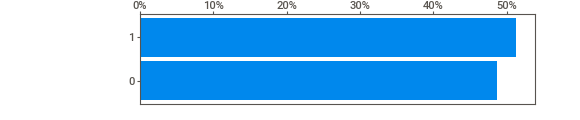
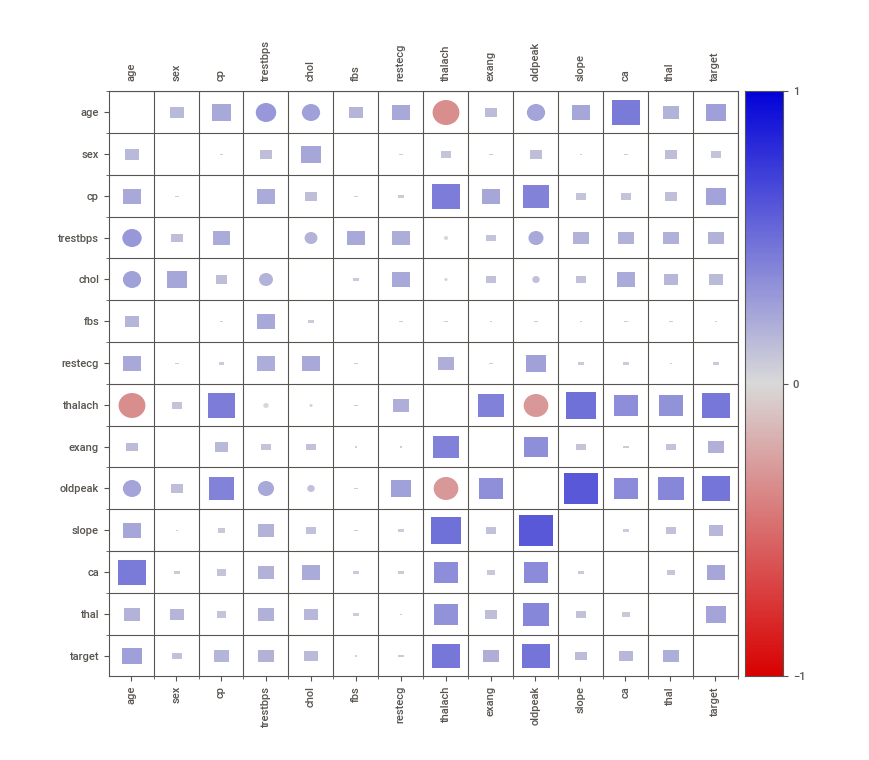
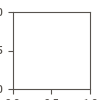

In [13]:
My_Report = sv.analyze(Data)
My_Report.show_notebook(w=None, h=None, scale=None, layout="widescreen", filepath=None)

In [14]:
if Data.isnull().values.any():
    print("Unfortunately, there are missing values in the dataset\n")
else:
    print("Fortunately, there aren't missing values in the dataset.")

Fortunately, there aren't missing values in the dataset.


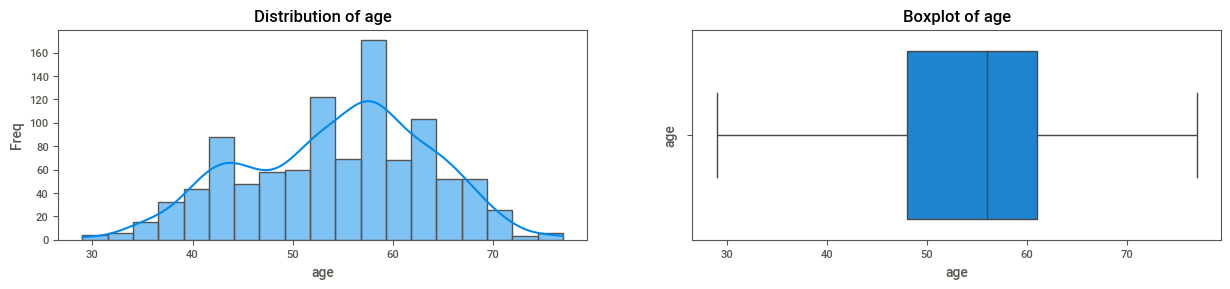

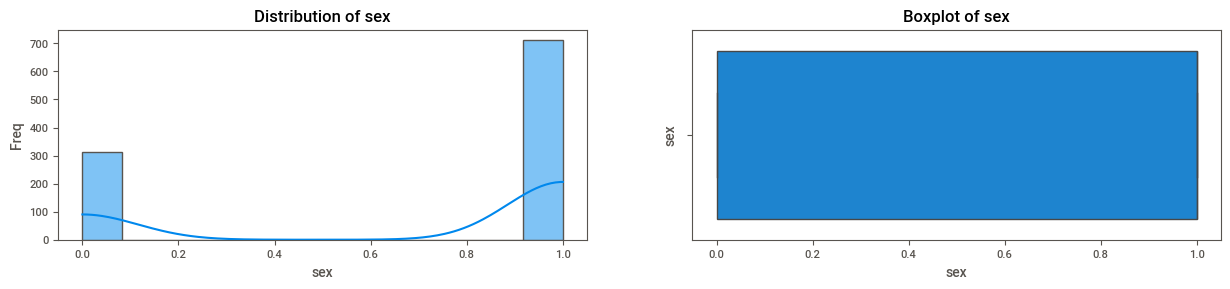

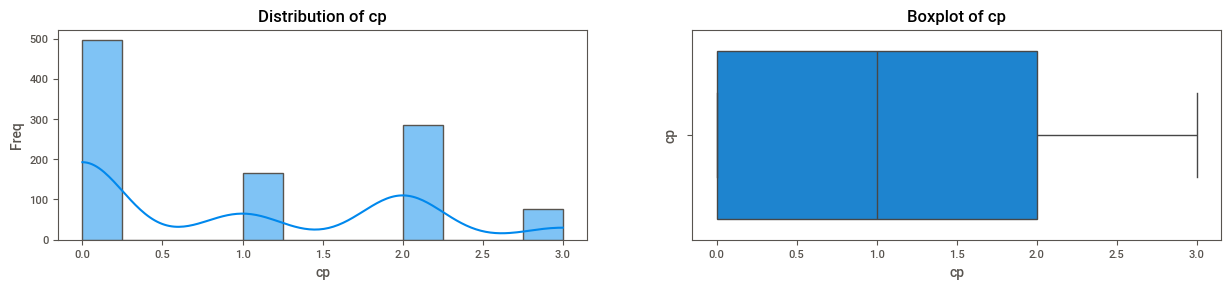

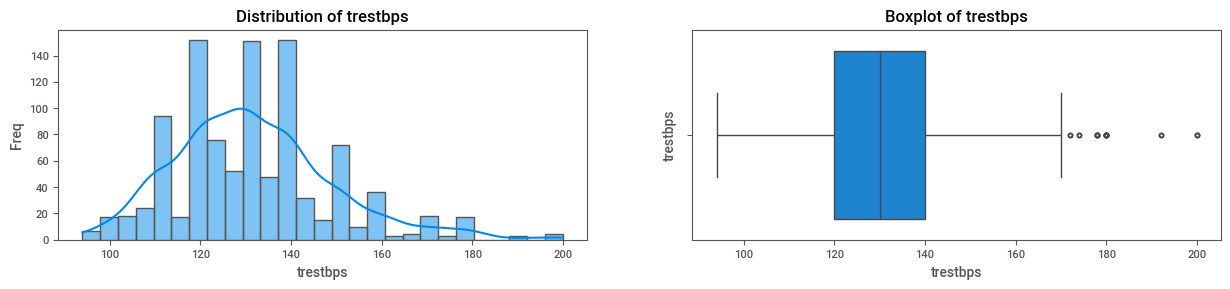

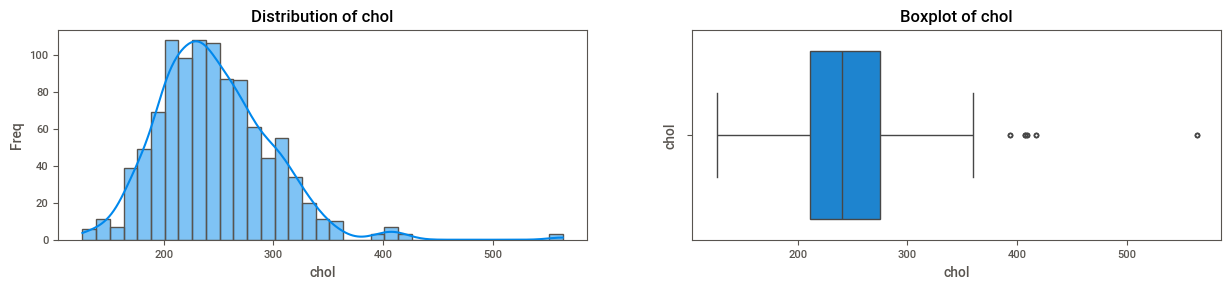

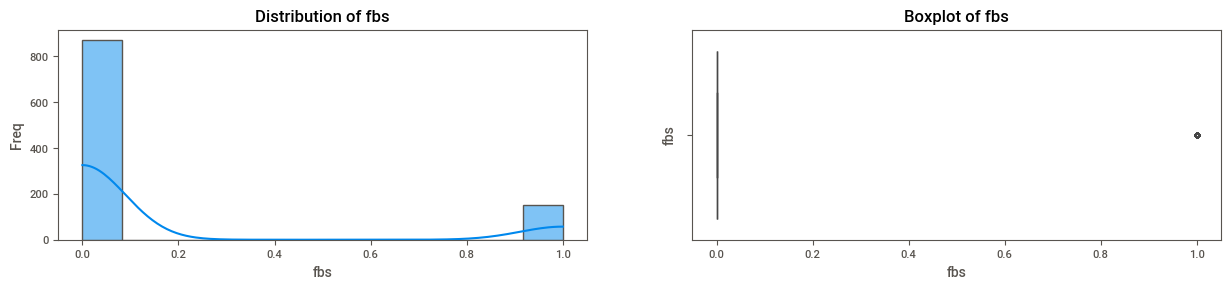

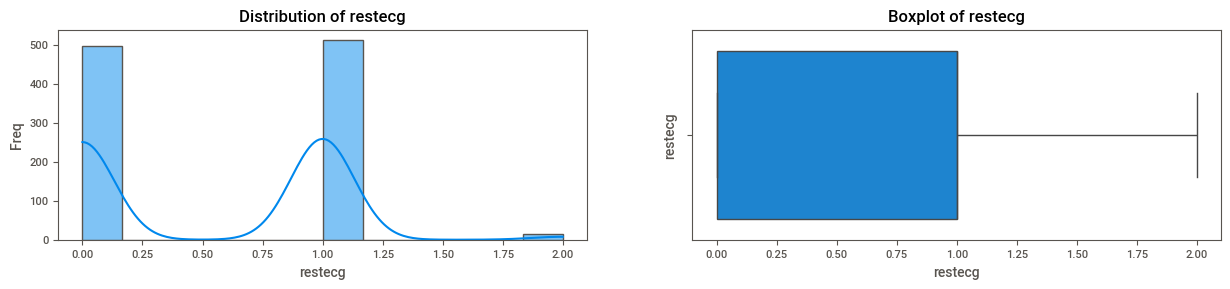

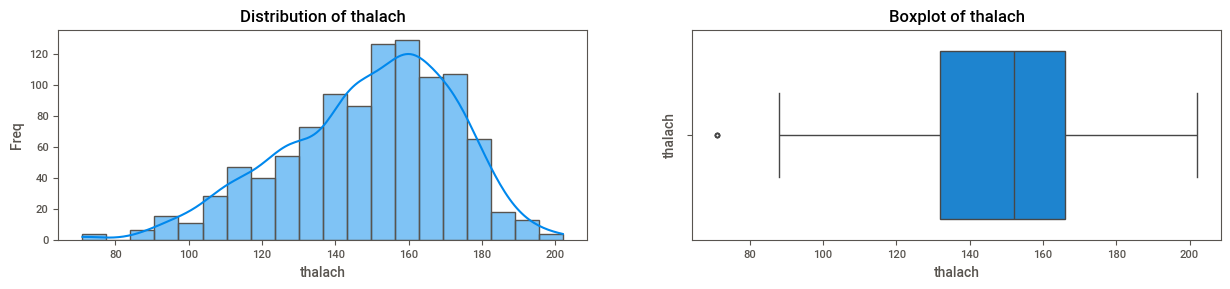

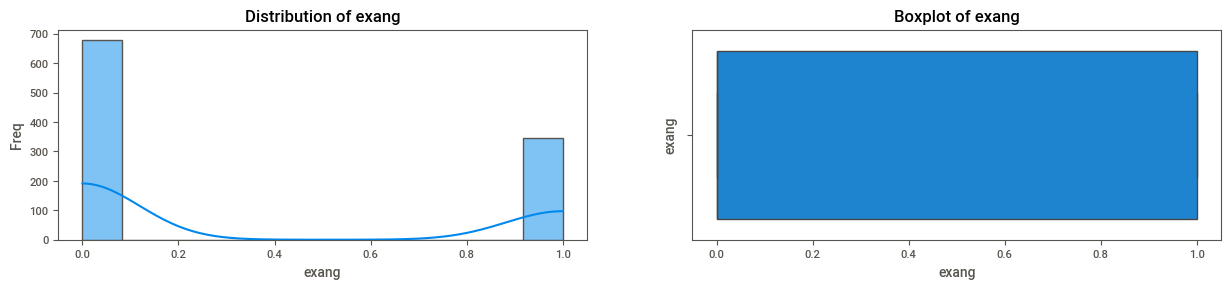

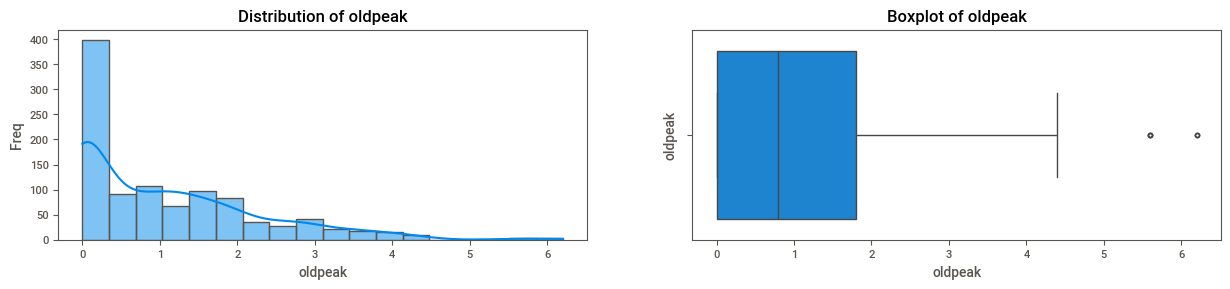

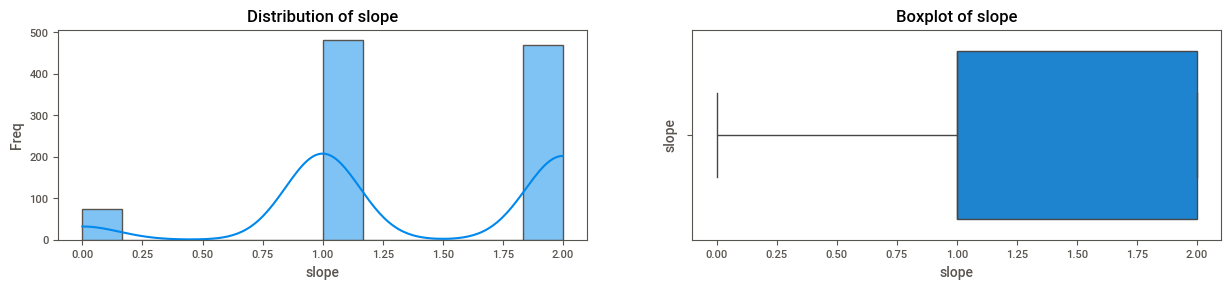

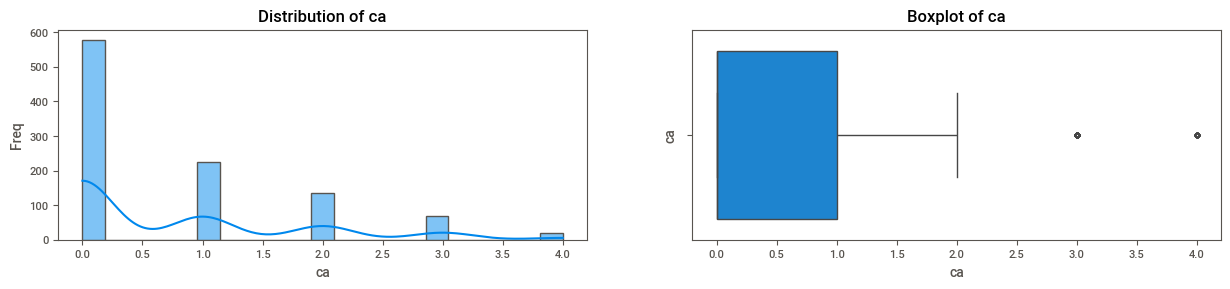

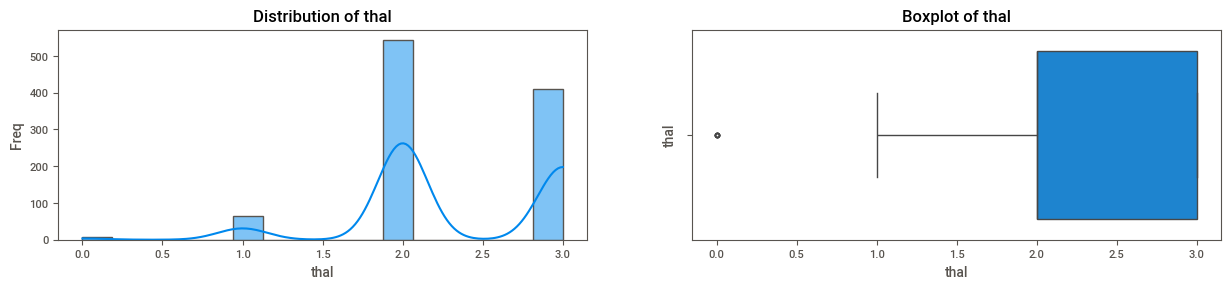

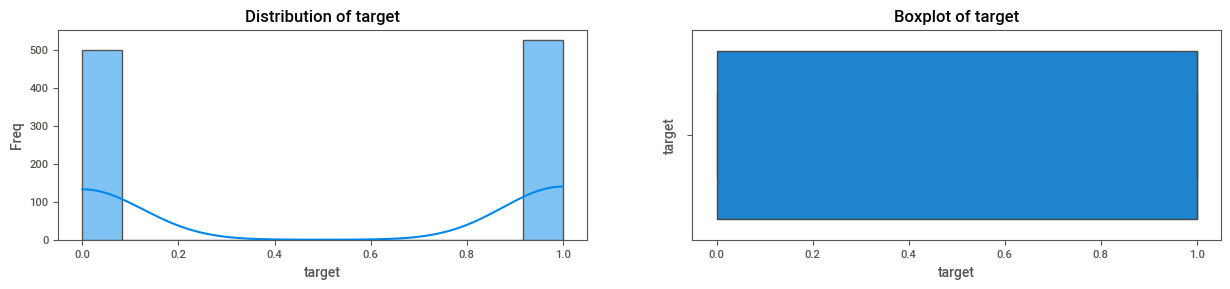

In [15]:
for column in Data.columns:
    if Data[column].dtype!="object":
        plt.figure(figsize=(15, 6))
        plt.subplot(2, 2, 1)
        sns.histplot(data=Data, x=column, kde=True)
        plt.ylabel("Freq")
        plt.xlabel(column)
        plt.title(f"Distribution of {column}")
        plt.subplot(2, 2, 2)
        sns.boxplot(data=Data, x=column)
        plt.ylabel(column)
        plt.title(f"Boxplot of {column}")
        plt.show()

In [16]:
Z_Scores = (Data - Data.mean()) / Data.std()
Threshold = 3    # Is a commonly used standard
Outliers = (Z_Scores > Threshold) | (Z_Scores < -Threshold)

# Check if there are any outliers
if Outliers.any().any():
    print("Outliers detected in the dataset. Removing them...")

    # Remove Outliers
    Data = Data[~Outliers.any(axis=1)]
    Data.reset_index(drop=True, inplace=True)

    print("Outliers removed. Data shape:", Data.shape)
else:
    print("No outliers detected in the dataset.")

Outliers detected in the dataset. Removing them...
Outliers removed. Data shape: (969, 14)


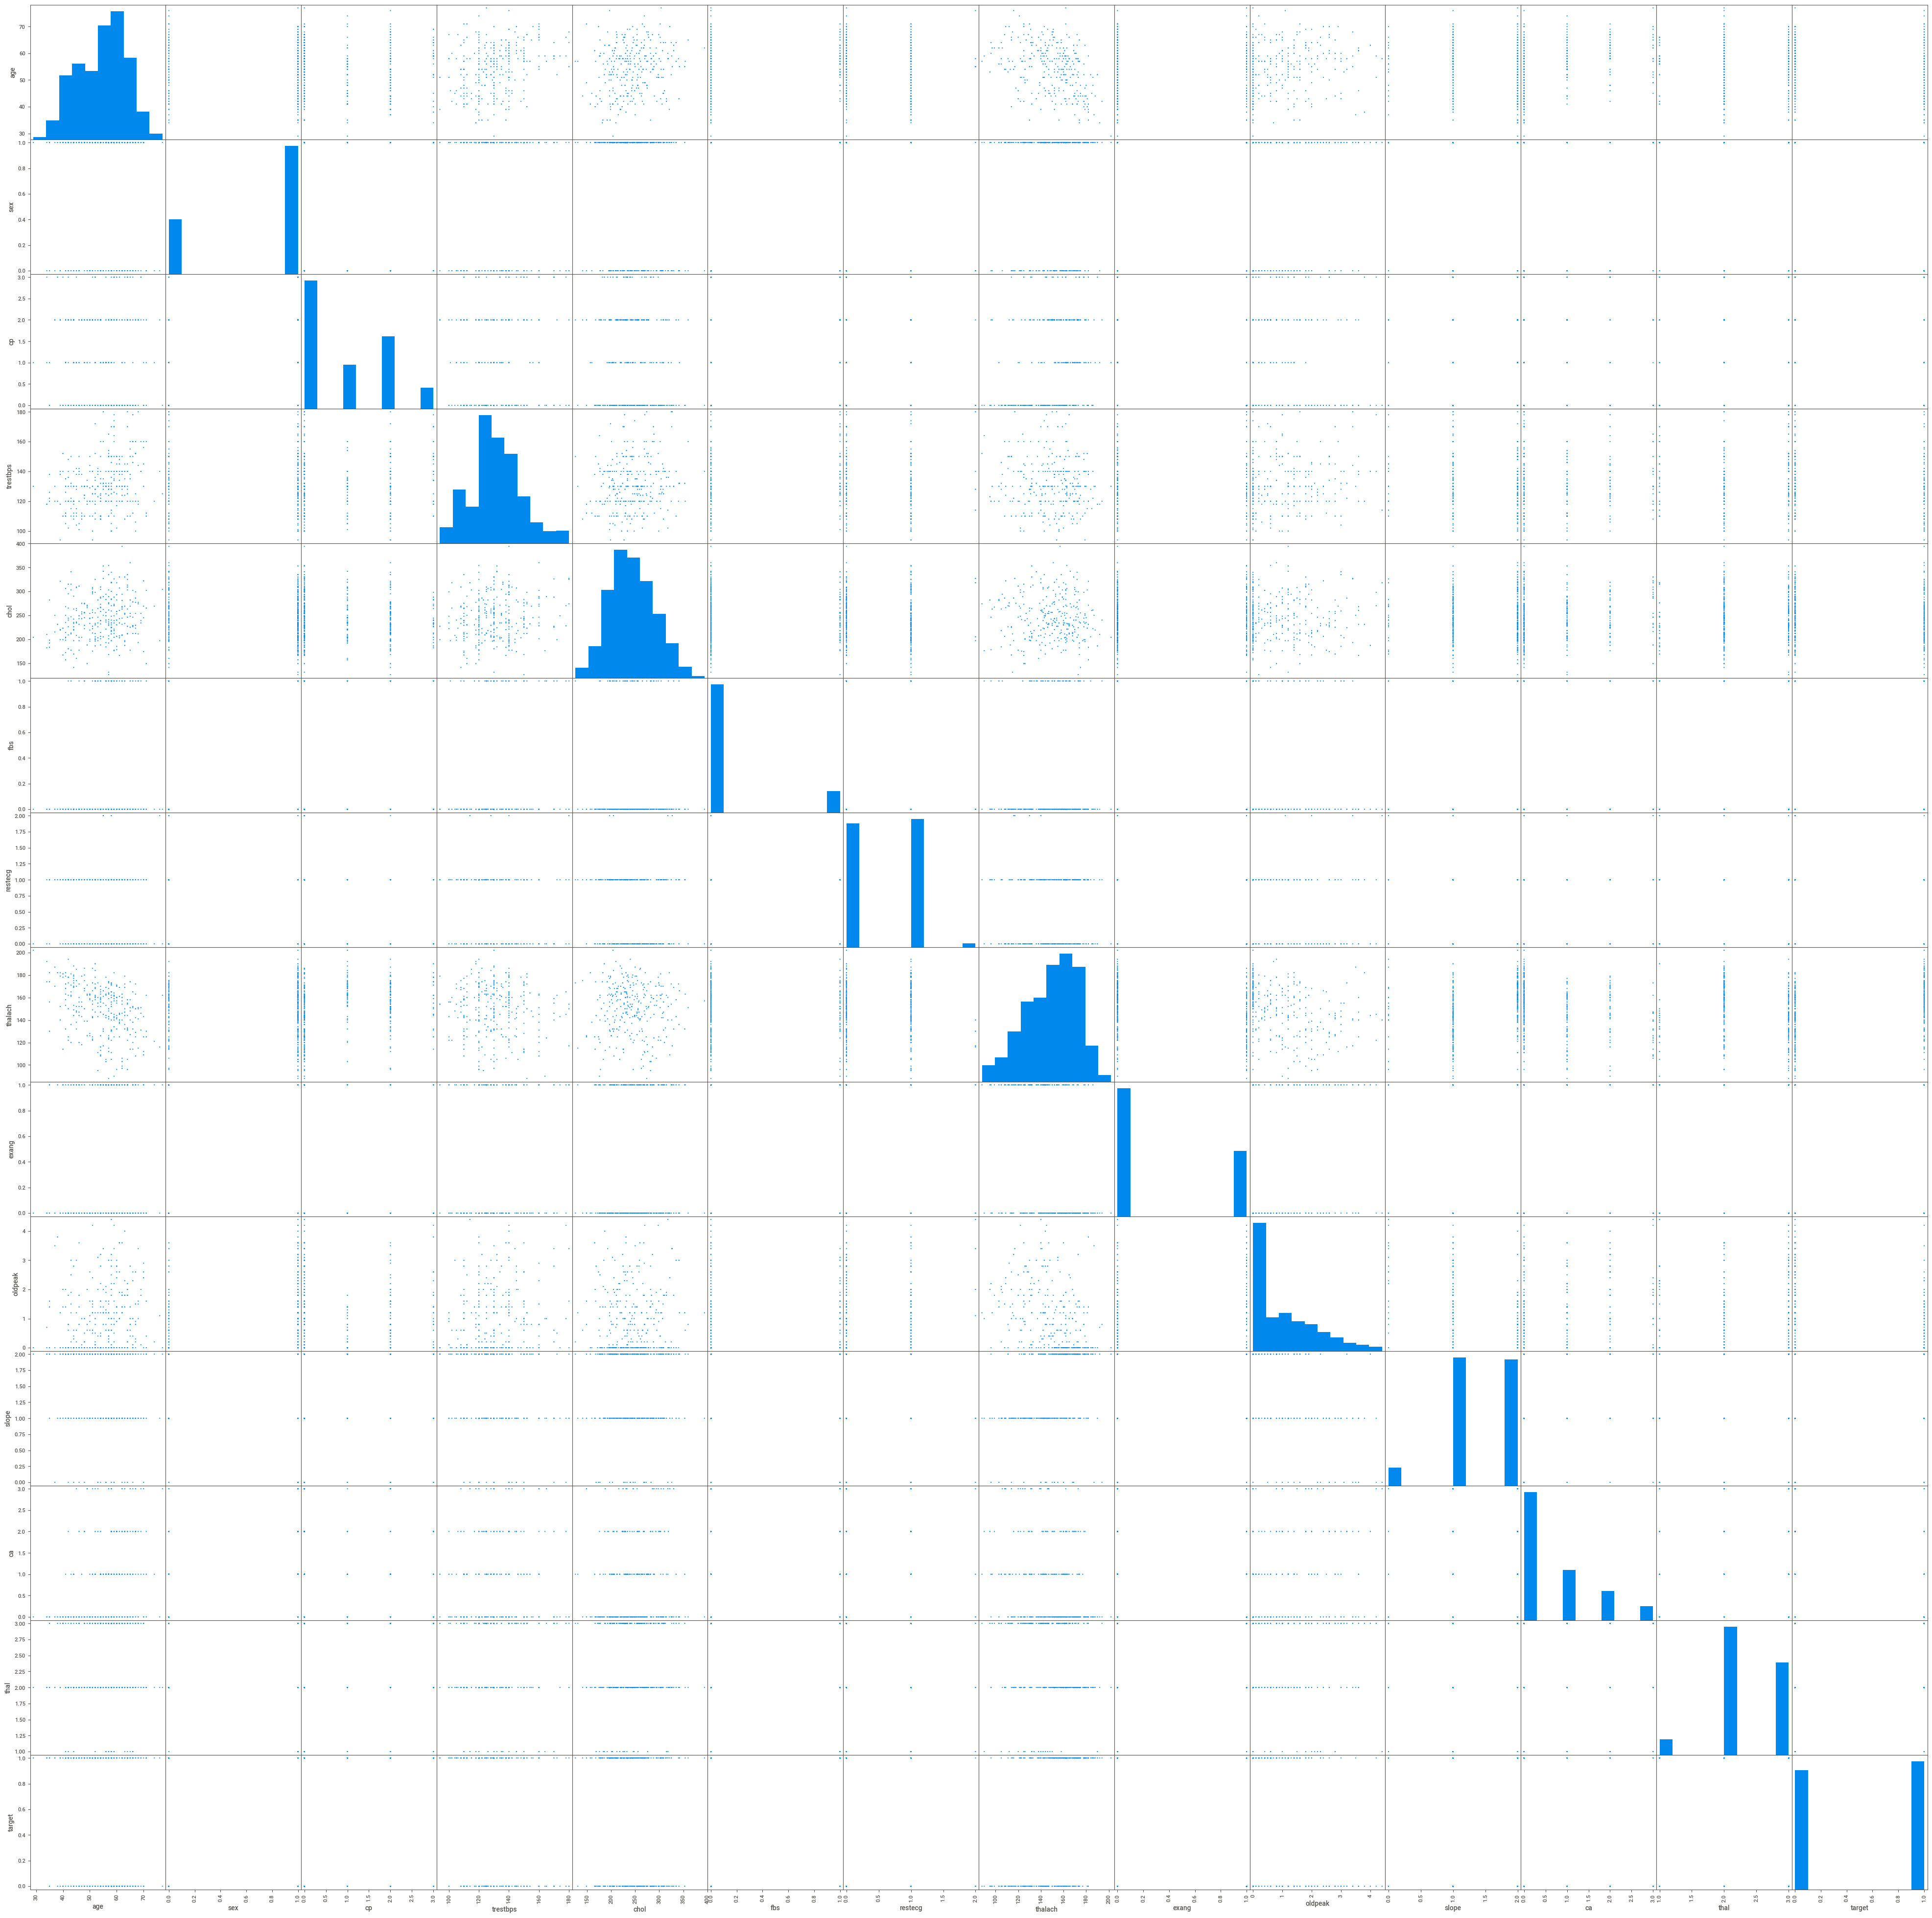

In [17]:
scatter_matrix(Data, figsize=(50,50));

In [18]:
Data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
# Check labels in "sex" feature

Data["sex"].unique()

array([1, 0])

In [20]:
Data["sex"].value_counts()

sex
1    680
0    289
Name: count, dtype: int64

In [21]:
Data["sex"].replace({0:"Female", 1:"Male"}, inplace=True)

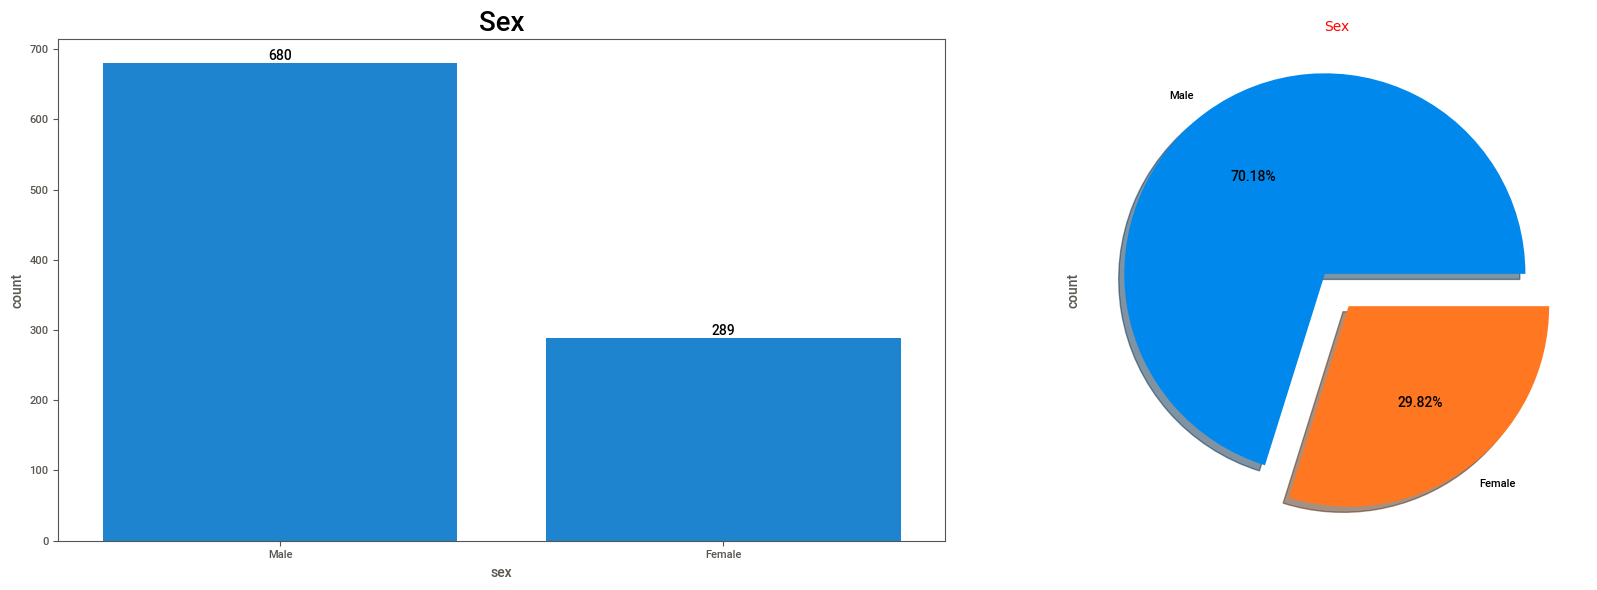

In [22]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x="sex", data=Data)
ax1.bar_label(ax1.containers[0])
ax1.set_title("Sex", fontsize=20)

# Second Subplot
ax2 = plt.subplot(1, 2, 2)
Data["sex"].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.2f%%", shadow=True)
ax2.set_title(label="Sex", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

In [23]:
# Check labels in "cp" feature

Data["cp"].unique()

array([0, 1, 2, 3])

In [24]:
Data["cp"].value_counts()

cp
0    468
2    264
1    160
3     77
Name: count, dtype: int64

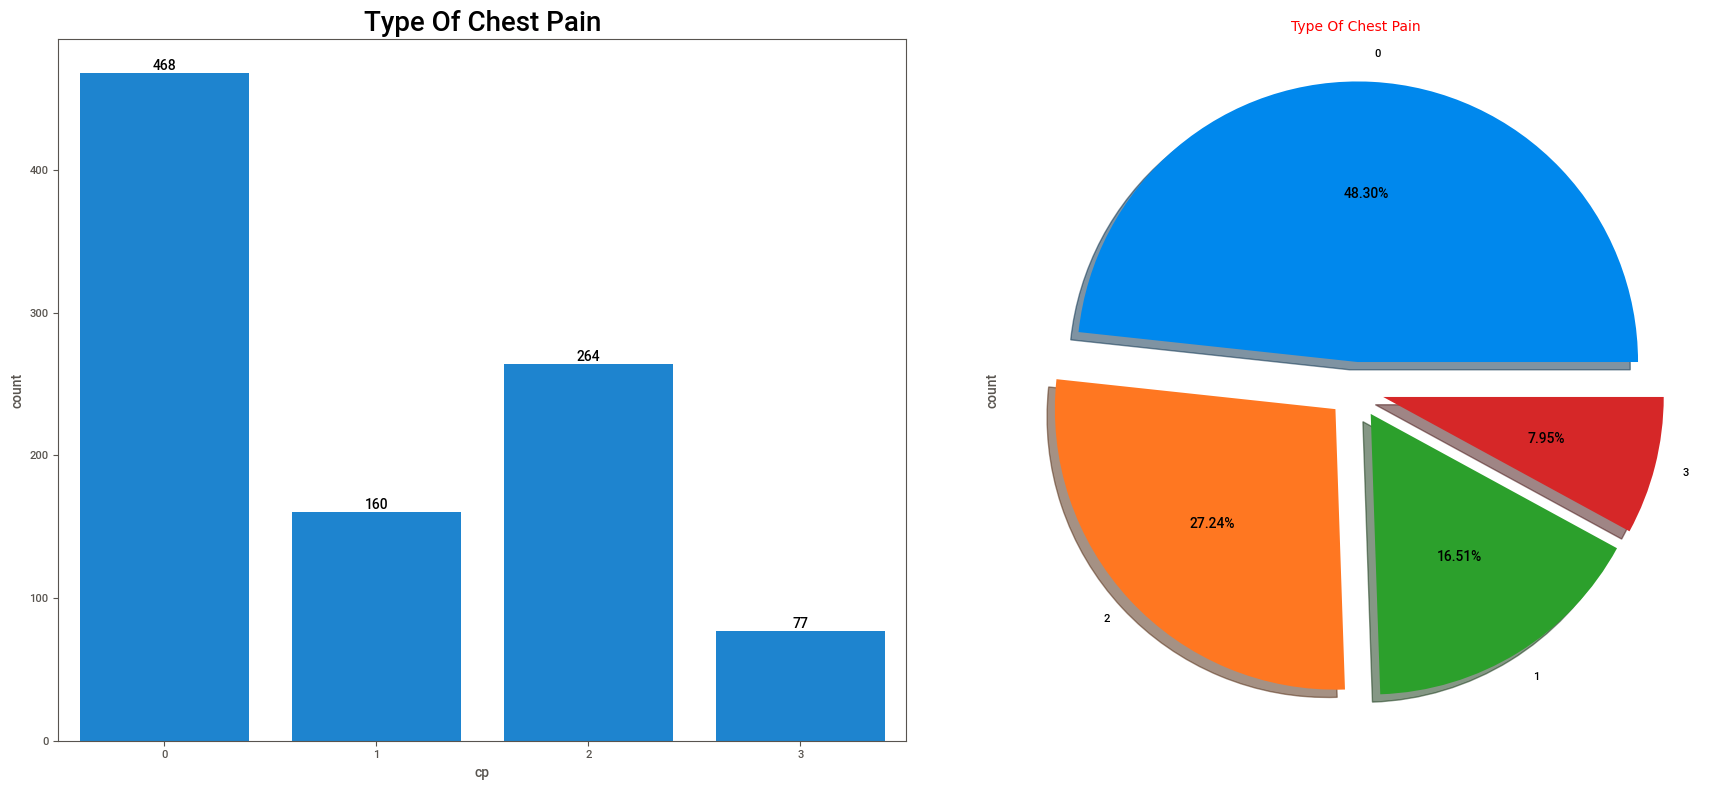

In [25]:
# Set the figure size
plt.figure(figsize=(18, 8))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="cp", data=Data, ax=Left_Shape)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Type Of Chest Pain", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["cp"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1], autopct="%1.2f%%",
                                   shadow=True, ax=Right_Shape)

Right_Shape.set_title(label="Type Of Chest Pain", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

In [26]:
# Check labels in "fbs" feature

Data["fbs"].unique()

array([0, 1])

In [27]:
Data["fbs"].value_counts()

fbs
0    830
1    139
Name: count, dtype: int64

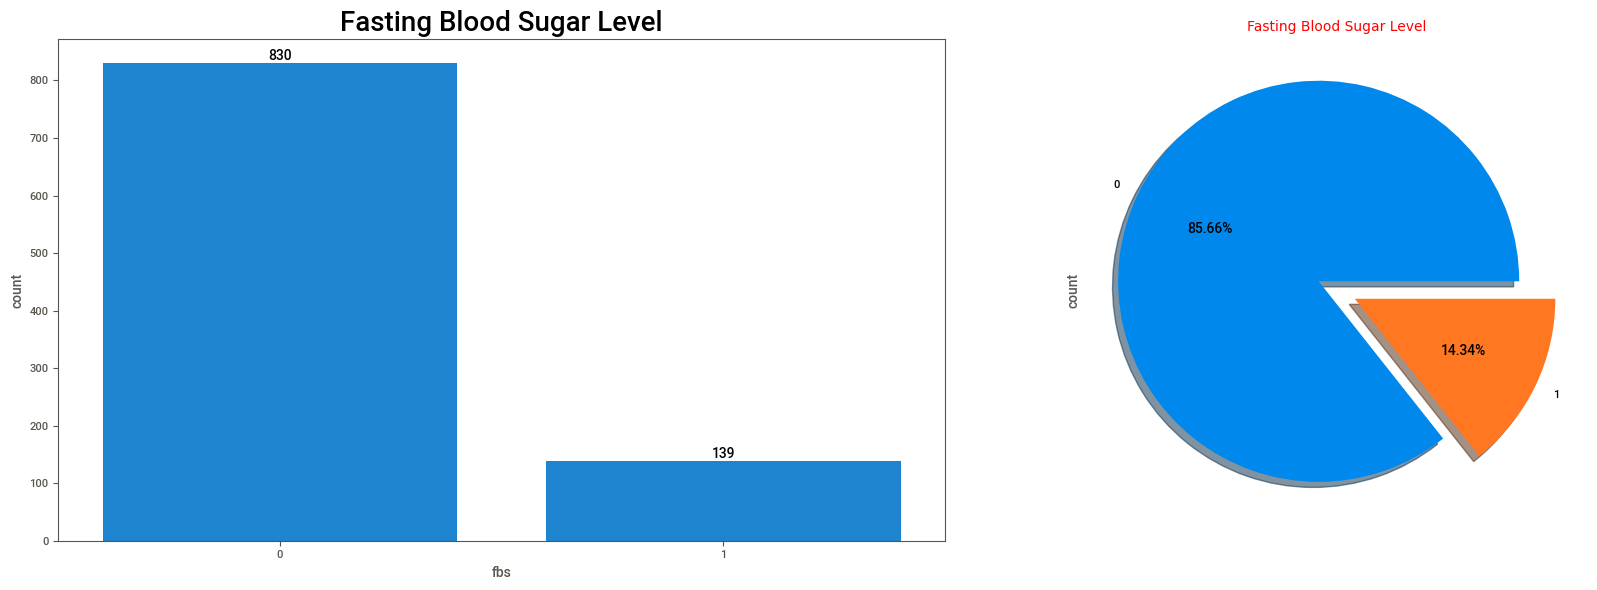

In [28]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="fbs", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Fasting Blood Sugar Level", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["fbs"].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Fasting Blood Sugar Level", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

In [29]:
# Check labels in "restecg" feature

Data["restecg"].unique()

array([1, 0, 2])

In [30]:
Data["restecg"].value_counts()

restecg
1    486
0    468
2     15
Name: count, dtype: int64

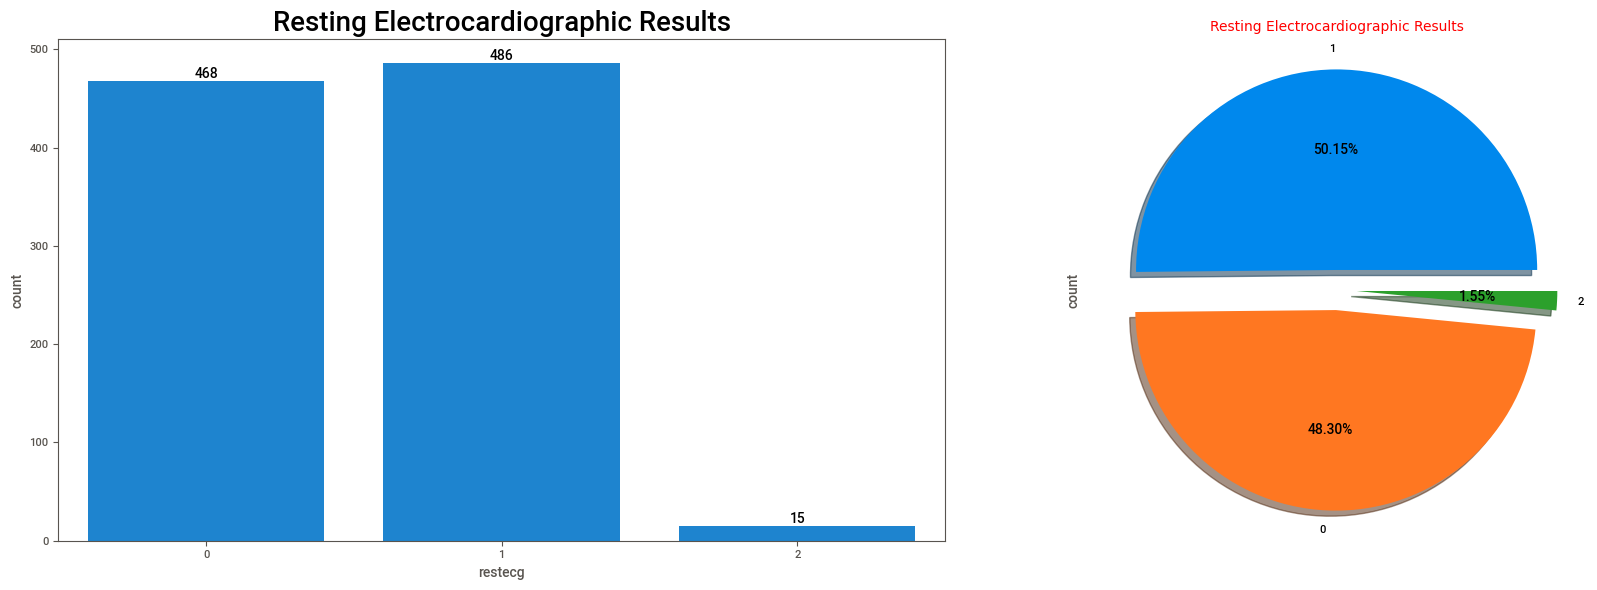

In [31]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="restecg", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Resting Electrocardiographic Results", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["restecg"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Resting Electrocardiographic Results", fontsize=50,
                      color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

In [32]:
# Check labels in "exang" feature

Data["exang"].unique()

array([0, 1])

In [33]:
Data["exang"].value_counts()

exang
0    642
1    327
Name: count, dtype: int64

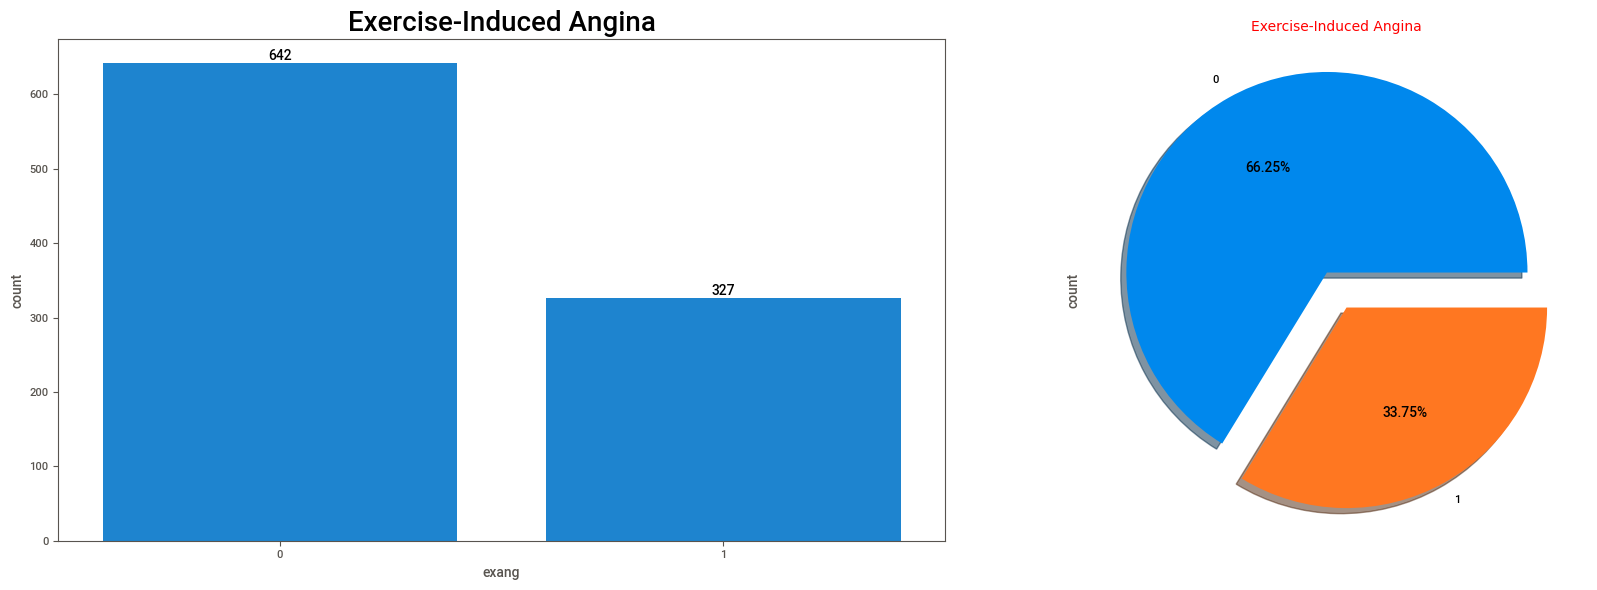

In [34]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="exang", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Exercise-Induced Angina", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["exang"].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Exercise-Induced Angina", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

In [35]:
# Check labels in "slope" feature

Data["slope"].unique()

array([2, 0, 1])

In [36]:
Data["slope"].value_counts()

slope
1    457
2    449
0     63
Name: count, dtype: int64

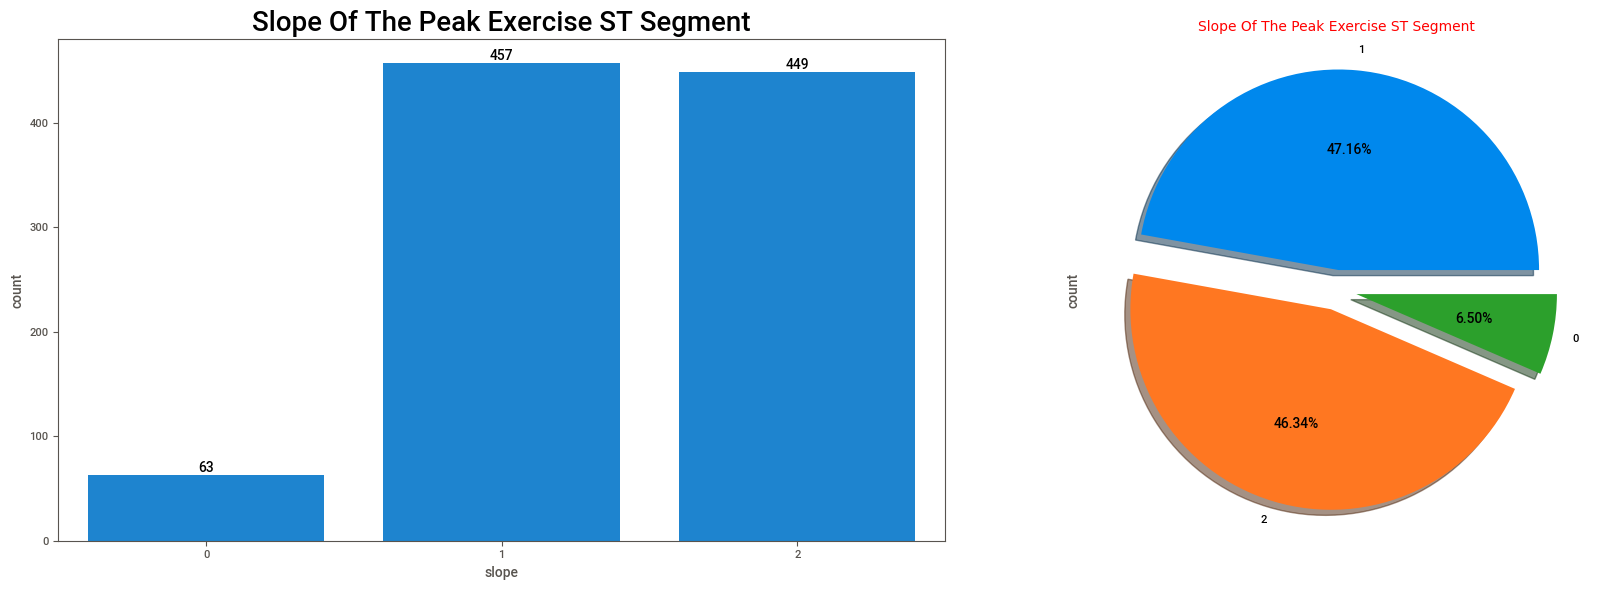

In [37]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="slope", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Slope Of The Peak Exercise ST Segment", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["slope"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Slope Of The Peak Exercise ST Segment", fontsize=50,
                      color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

In [38]:
# Check labels in "ca" feature

Data["ca"].unique()

array([2, 0, 1, 3])

In [39]:
Data["ca"].value_counts()

ca
0    560
1    220
2    127
3     62
Name: count, dtype: int64

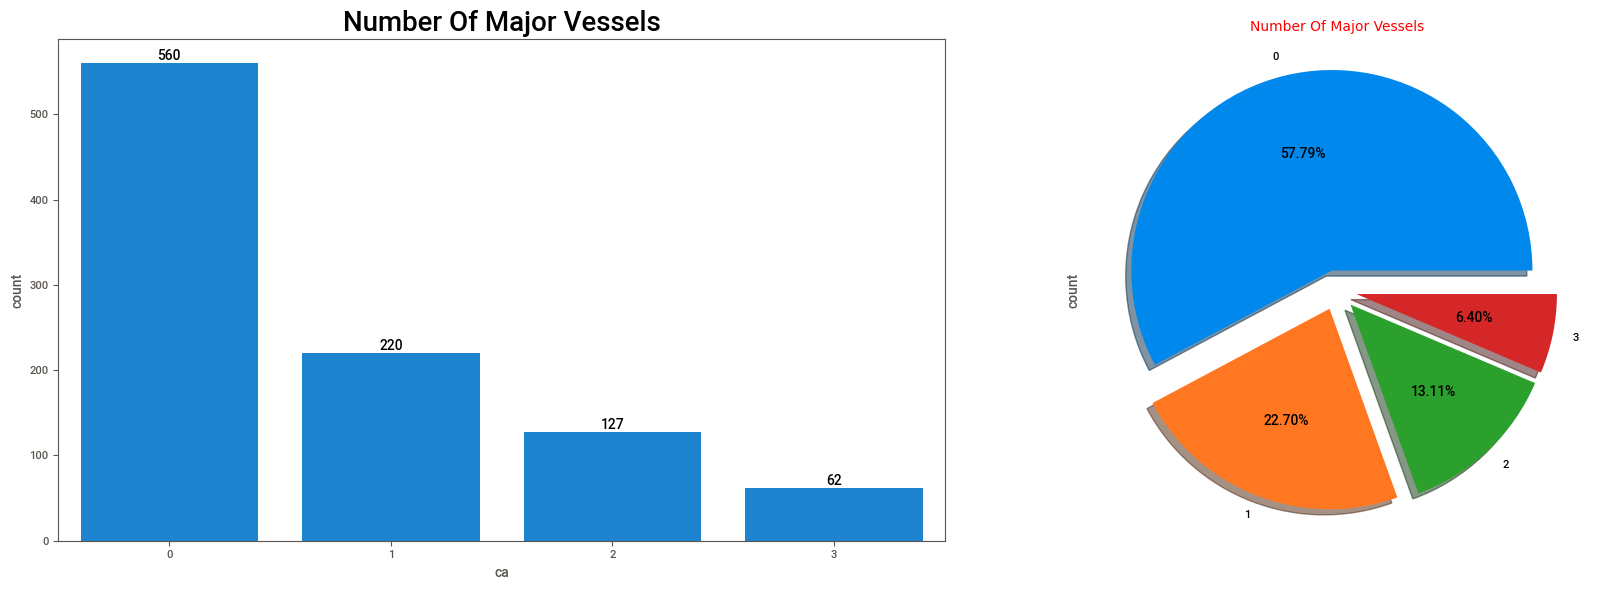

In [40]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="ca", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Number Of Major Vessels", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["ca"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Number Of Major Vessels", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

In [41]:
# Check labels in "thal" feature

Data["thal"].unique()

array([3, 2, 1])

In [42]:
Data["thal"].value_counts()

thal
2    526
3    379
1     64
Name: count, dtype: int64

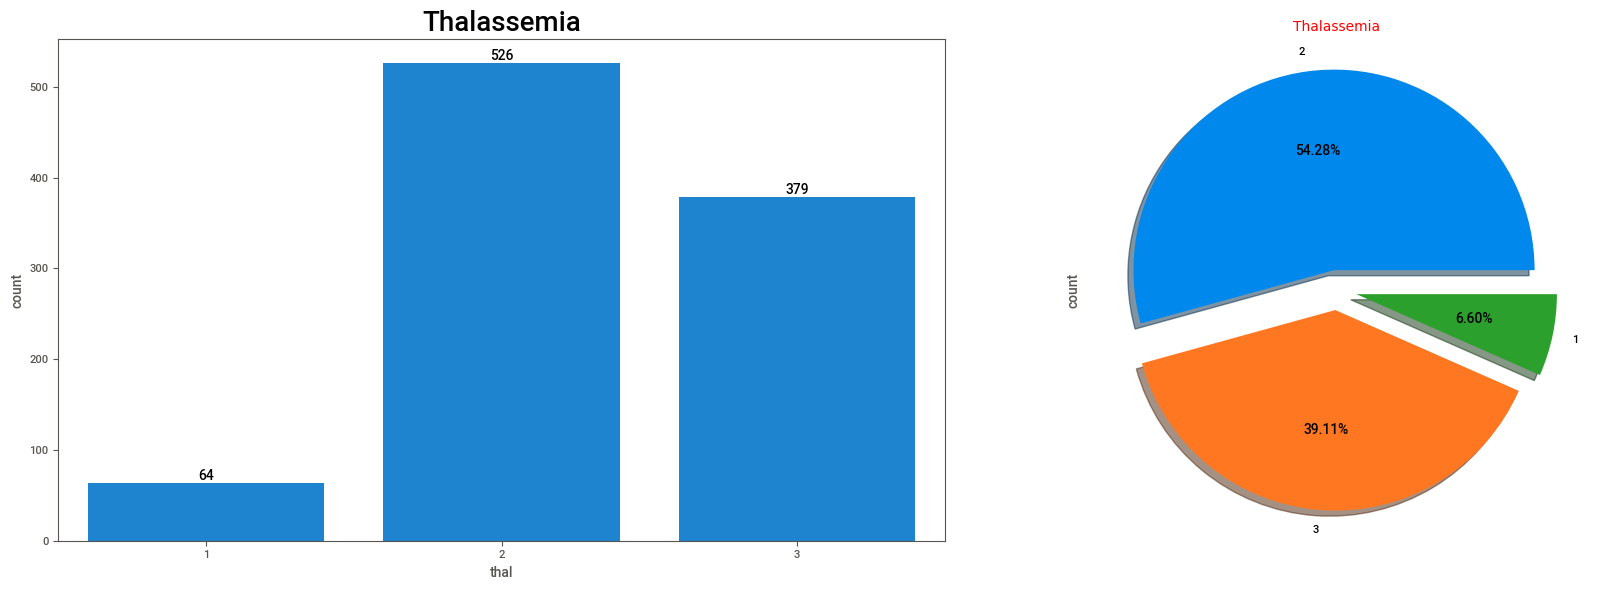

In [43]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="thal", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Thalassemia", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["thal"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Thalassemia", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

In [44]:
# Check labels in "target" feature

Data["target"].unique()

array([0, 1])

In [45]:
Data["target"].value_counts()

# (0) => This person hasn't heart disease.
# (1) => This person has heart disease.

target
1    502
0    467
Name: count, dtype: int64

In [46]:
Data["target"].replace({0:"This person hasn't heart disease",
                        1:"This person has heart disease"}, inplace=True)

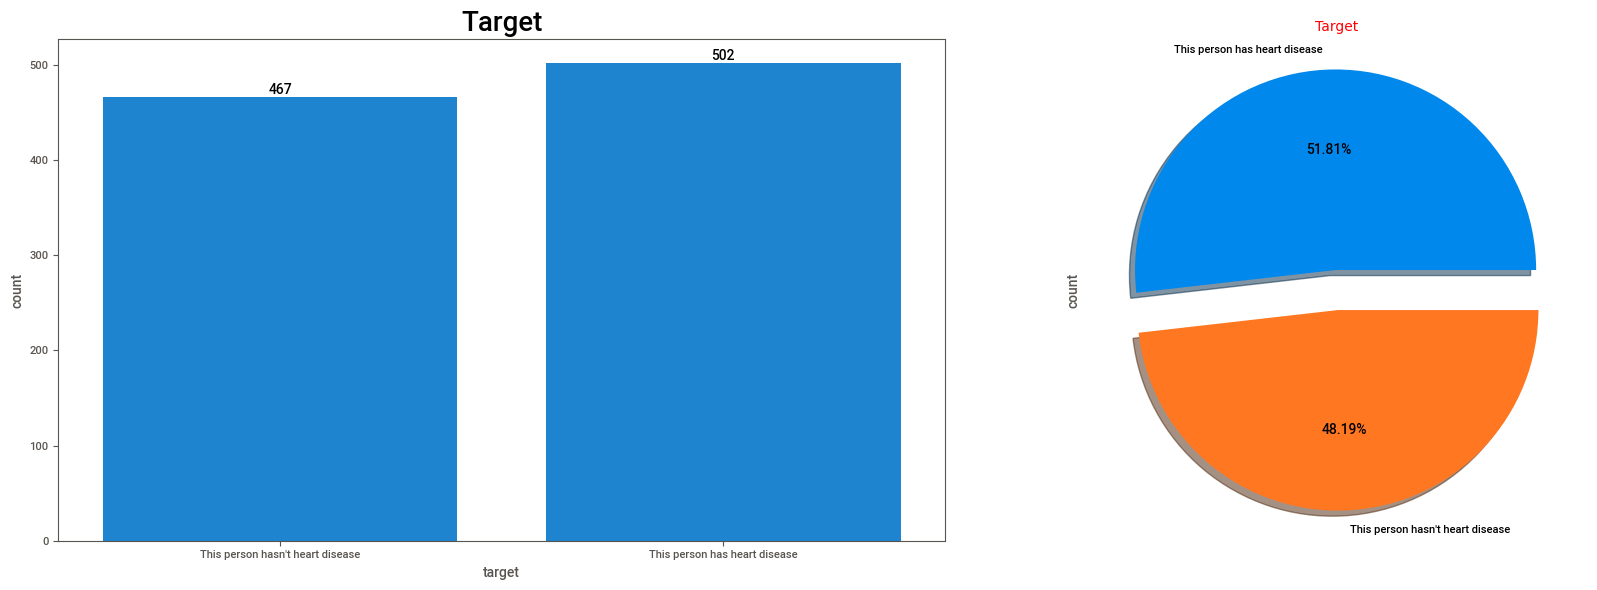

In [47]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="target", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Target", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["target"].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Target", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

In [48]:
# Univariate Analysis

Fig = px.histogram(Data, x="target", color="sex", hover_data=Data.columns,
                   title="Distribution Of Heart Diseases", barmode="group")

Fig.update_layout(width=1000, height=600, xaxis_title="Heart Disease", yaxis_title="count")
Fig.show()

In [49]:
# Label Encoding
Data["sex"].replace({"Female":0, "Male":1}, inplace=True)

# Label Encoding
Data["target"].replace({"This person hasn't heart disease":0,
                        "This person has heart disease":1}, inplace=True)

In [50]:
# The correlation between features
# Understanding the correlation between various features in the dataset
# Select only the numeric columns

Data.corr().style.background_gradient(cmap="coolwarm").format("{:.3f}")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.078,-0.059,0.298,0.183,0.133,-0.121,-0.388,0.102,0.191,-0.154,0.370,0.059,-0.227
sex,-0.078,1.000,-0.048,-0.057,-0.139,0.042,-0.107,-0.058,0.146,0.155,-0.051,0.131,0.236,-0.304
cp,-0.059,-0.048,1.000,0.062,-0.098,0.103,0.039,0.298,-0.390,-0.135,0.090,-0.217,-0.158,0.409
trestbps,0.298,-0.057,0.062,1.000,0.143,0.168,-0.100,-0.065,0.054,0.144,-0.097,0.060,0.023,-0.115
chol,0.183,-0.139,-0.098,0.143,1.000,0.013,-0.096,-0.042,0.086,0.038,0.001,0.117,0.051,-0.112
fbs,0.133,0.042,0.103,0.168,0.013,1.000,-0.095,-0.009,0.013,0.006,-0.045,0.156,-0.021,-0.024
restecg,-0.121,-0.107,0.039,-0.100,-0.096,-0.095,1.000,0.061,-0.067,-0.028,0.082,-0.095,0.004,0.128
thalach,-0.388,-0.058,0.298,-0.065,-0.042,-0.009,0.061,1.000,-0.396,-0.358,0.386,-0.299,-0.121,0.430
exang,0.102,0.146,-0.390,0.054,0.086,0.013,-0.067,-0.396,1.000,0.319,-0.249,0.153,0.216,-0.430
oldpeak,0.191,0.155,-0.135,0.144,0.038,0.006,-0.028,-0.358,0.319,1.000,-0.542,0.268,0.165,-0.432


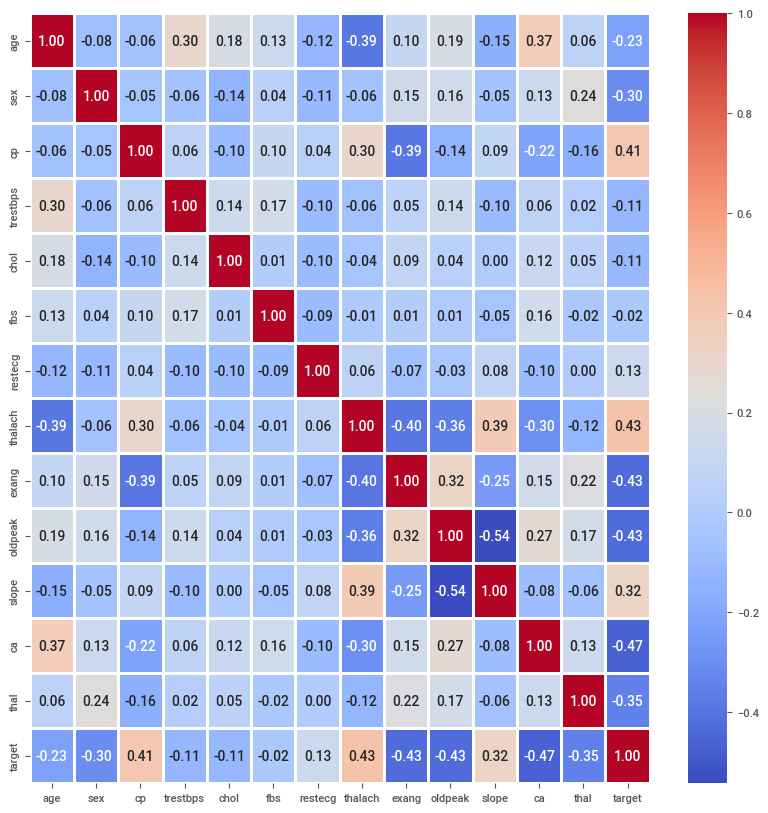

In [51]:
# Bivariate Analysis

plt.figure(figsize=(10, 10))
sns.heatmap(Data.corr(), annot=True, linewidths=0.9, fmt=".2f", cmap="coolwarm")
plt.show()

In [52]:
# The correlation between each feature and the "Outcome"
# Bivariate Analysis

Corr = Data[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak",
             "slope", "ca", "thal", "target"]].corr()["target"].sort_values(ascending = False)

Corr = Corr.to_frame()
Corr.style.background_gradient(cmap="coolwarm")

,target
target,1.000000
thalach,0.429920
cp,0.408999
slope,0.322791
restecg,0.127580
fbs,-0.023629
chol,-0.112342
trestbps,-0.114757
age,-0.227225
sex,-0.303739


In [53]:
# Dropping feature/s based on the correlation
# These features are the least correlated with "target"

Data.drop(["fbs", "chol"], inplace=True, axis=1)

In [54]:
Data.head() # Default : first 5 rows

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,1,168,0,1.0,2,2,3,0
1,53,1,0,140,0,155,1,3.1,0,0,3,0
2,70,1,0,145,1,125,1,2.6,0,0,3,0
3,61,1,0,148,1,161,0,0.0,2,1,3,0
4,62,0,0,138,1,106,0,1.9,1,3,2,0


In [55]:
# X Data
X = Data.drop(["target"], axis=1)
print("X shape is : ", X.shape)

# y Data
y = Data["target"]
print("y shape is : ", y.shape)

X shape is :  (969, 11)
y shape is :  (969,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42, shuffle=True)

# Splitted Data
print("X_train shape is ", X_train.shape)
print("X_val shape is ", X_test.shape)
print("y_train shape is ", y_train.shape)
print("y_val shape is ", y_test.shape)

X_train shape is  (746, 11)
X_val shape is  (223, 11)
y_train shape is  (746,)
y_val shape is  (223,)


In [57]:
# Standardization (Z-Score Normalization)
# StandardScaler For Data

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [58]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train, y_train)
y_train_pred_LR = Model_LR.predict(X_train)
y_test_pred_LR = Model_LR.predict(X_test)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_LR)
Test_Accuracy_LR = accuracy_score(y_test, y_test_pred_LR)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_LR*100:.2f} %")

Training Accuracy: 86.33 %
Testing Accuracy: 87.00 %


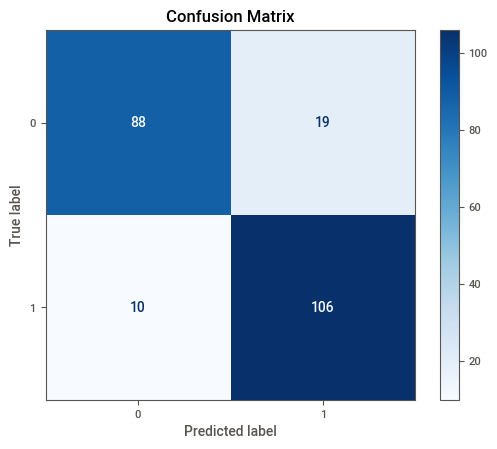

In [59]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_LR)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [60]:
print(classification_report(y_test, y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       107
           1       0.85      0.91      0.88       116

    accuracy                           0.87       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.87      0.87      0.87       223



In [61]:
# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_test_pred_LR)
print(f"➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_test_pred_LR)
print(f"➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_test_pred_LR)
print(f"➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_LR = roc_auc_score(y_test, y_test_pred_LR)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_LR * 100 : .2f} %\n")

➤➤➤ Precision Score :  84.80 %

➤➤➤ Recall Score :  91.38 %

➤➤➤ F1 Score :  87.97 %

➤➤➤ ROC_AUC :  86.81 %



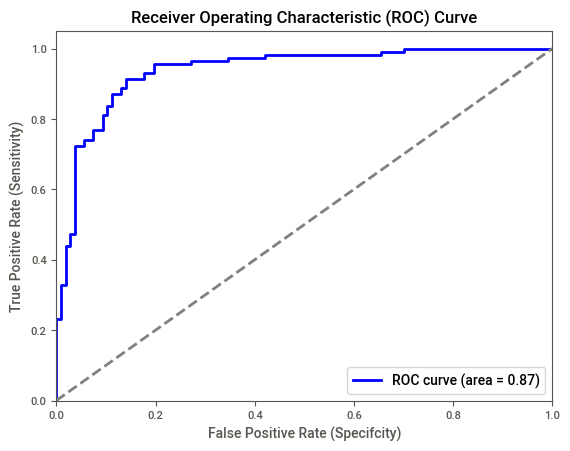

In [62]:
# Compute ROC curve

y_pred_prob = Model_LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_LR:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Execution Time Of Model: 6e-05 Seconds



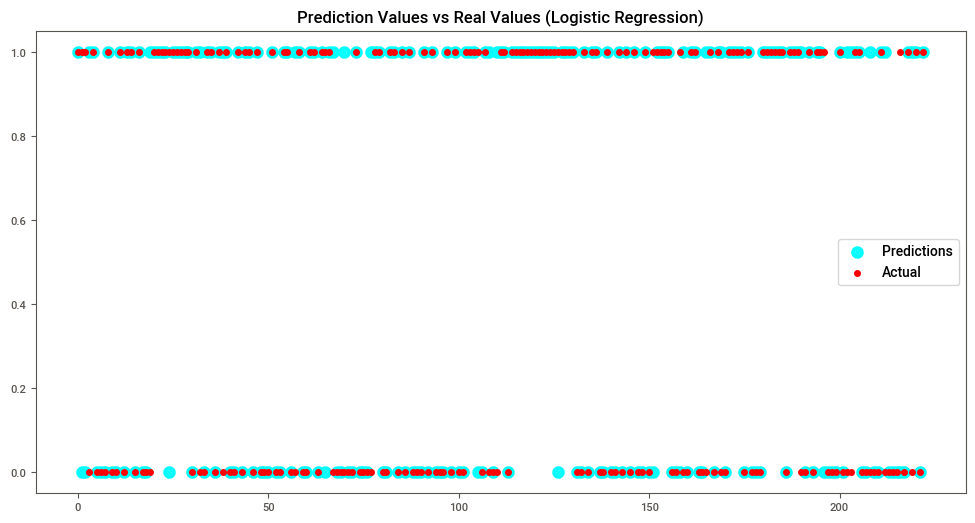

In [63]:
Start = time.time()
End = time.time()
Model_LR_Time = End - Start
print(f"Execution Time Of Model: {round((Model_LR_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test_pred_LR)), y_test_pred_LR, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_test)), y_test, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Logistic Regression)")
plt.legend()
plt.show()

In [64]:
Model_KNN = KNeighborsClassifier(n_neighbors=3)
Model_KNN.fit(X_train, y_train)
y_train_pred_KNN = Model_KNN.predict(X_train)
y_test_pred_KNN = Model_KNN.predict(X_test)

# Quick evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_KNN)
Test_Accuracy_KNN = accuracy_score(y_test, y_test_pred_KNN)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_KNN*100:.2f} %")

Training Accuracy: 99.73 %
Testing Accuracy: 98.21 %


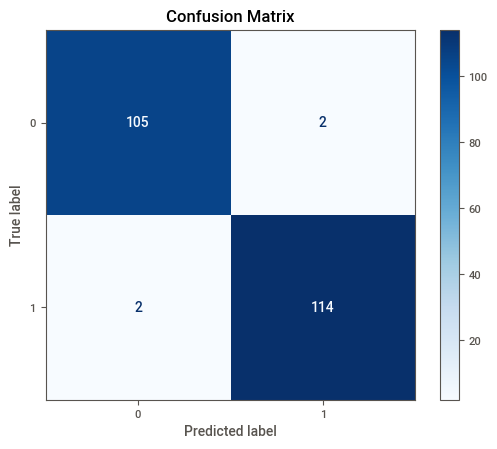

In [65]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_KNN)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [66]:
print(classification_report(y_test, y_test_pred_KNN))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.98      0.98      0.98       116

    accuracy                           0.98       223
   macro avg       0.98      0.98      0.98       223
weighted avg       0.98      0.98      0.98       223



In [67]:
# Precision = TP / (TP + FP)
Precision_KNN = precision_score(y_test, y_test_pred_KNN)
print(f"➤➤➤ Precision Score : {Precision_KNN * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_KNN = recall_score(y_test, y_test_pred_KNN)
print(f"➤➤➤ Recall Score : {Recall_KNN * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_KNN = f1_score(y_test, y_test_pred_KNN)
print(f"➤➤➤ F1 Score : {F1_Score_KNN * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_KNN = roc_auc_score(y_test, y_test_pred_KNN)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_KNN * 100 : .2f} %\n")

➤➤➤ Precision Score :  98.28 %

➤➤➤ Recall Score :  98.28 %

➤➤➤ F1 Score :  98.28 %

➤➤➤ ROC_AUC :  98.20 %



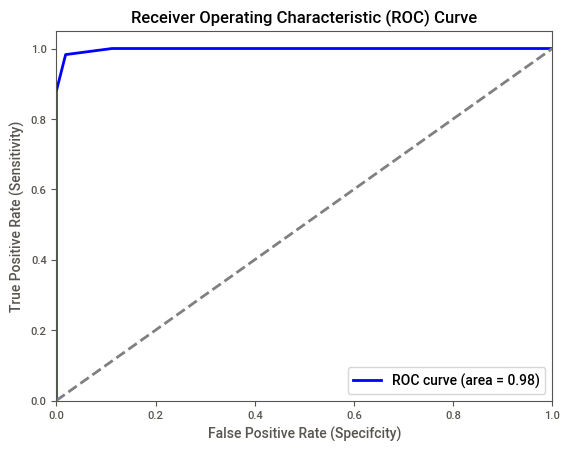

In [68]:
# Compute ROC curve

y_pred_prob = Model_KNN.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_KNN:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [69]:
Model_SVC = SVC(kernel="linear")
Model_SVC.fit(X_train, y_train)
y_train_pred_SVC = Model_SVC.predict(X_train)
y_test_pred_SVC = Model_SVC.predict(X_test)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_SVC)
Test_Accuracy_SVC = accuracy_score(y_test, y_test_pred_SVC)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_SVC*100:.2f} %")

Training Accuracy: 86.46 %
Testing Accuracy: 87.89 %


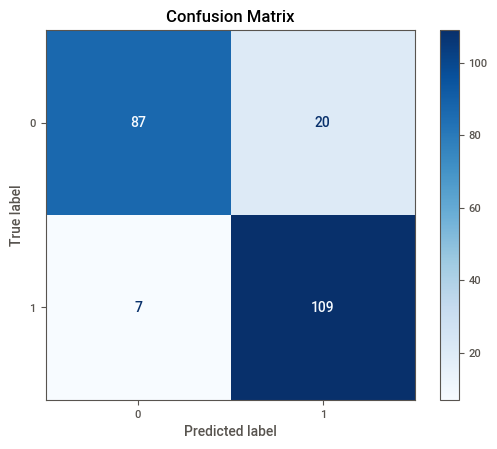

In [70]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_SVC)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [71]:
print(classification_report(y_test, y_test_pred_SVC))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       107
           1       0.84      0.94      0.89       116

    accuracy                           0.88       223
   macro avg       0.89      0.88      0.88       223
weighted avg       0.88      0.88      0.88       223



In [72]:
# Precision = TP / (TP + FP)
Precision_SVC = precision_score(y_test, y_test_pred_SVC)
print(f"➤➤➤ Precision Score : {Precision_SVC * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_SVC = recall_score(y_test, y_test_pred_SVC)
print(f"➤➤➤ Recall Score : {Recall_SVC * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_SVC = f1_score(y_test, y_test_pred_SVC)
print(f"➤➤➤ F1 Score : {F1_Score_SVC * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_SVC = roc_auc_score(y_test, y_test_pred_SVC)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_SVC * 100 : .2f} %\n")

➤➤➤ Precision Score :  84.50 %

➤➤➤ Recall Score :  93.97 %

➤➤➤ F1 Score :  88.98 %

➤➤➤ ROC_AUC :  87.64 %



In [73]:
Model_DT = DecisionTreeClassifier(random_state=42, max_depth=7)
Model_DT.fit(X_train, y_train)
y_train_pred_DT = Model_DT.predict(X_train)
y_test_pred_DT = Model_DT.predict(X_test)

# Quick evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_DT)
Test_Accuracy_DT = accuracy_score(y_test, y_test_pred_DT)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_DT*100:.2f} %")

Training Accuracy: 96.78 %
Testing Accuracy: 95.52 %


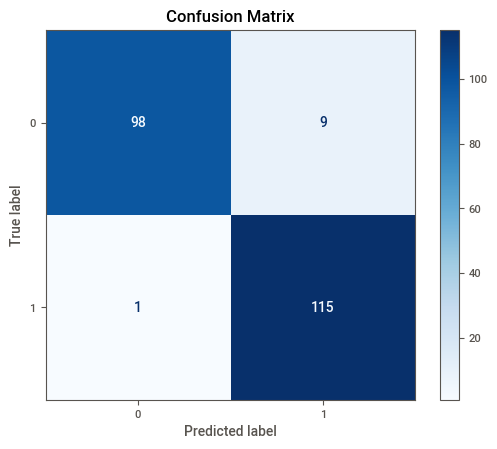

In [74]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_DT)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [75]:
print(classification_report(y_test, y_test_pred_DT))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       107
           1       0.93      0.99      0.96       116

    accuracy                           0.96       223
   macro avg       0.96      0.95      0.95       223
weighted avg       0.96      0.96      0.96       223



In [76]:
# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_test_pred_DT)
print(f"➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_test_pred_DT)
print(f"➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_test_pred_DT)
print(f"➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_DT = roc_auc_score(y_test, y_test_pred_DT)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_DT * 100 : .2f} %\n")

➤➤➤ Precision Score :  92.74 %

➤➤➤ Recall Score :  99.14 %

➤➤➤ F1 Score :  95.83 %

➤➤➤ ROC_AUC :  95.36 %



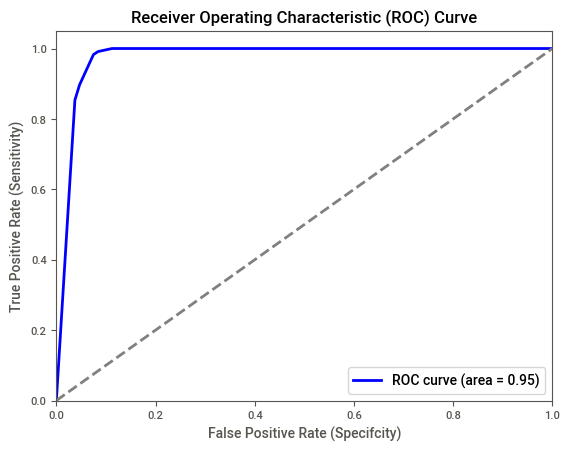

In [77]:
# Compute ROC curve

y_pred_prob = Model_DT.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_DT:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [78]:
Model_RF = RandomForestClassifier(random_state=42, max_depth=6)
Model_RF.fit(X_train, y_train)
y_train_pred_RF = Model_RF.predict(X_train)
y_test_pred_RF = Model_RF.predict(X_test)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_RF)
Test_Accuracy_RF = accuracy_score(y_test, y_test_pred_RF)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_RF*100:.2f} %")

Training Accuracy: 97.45 %
Testing Accuracy: 97.31 %


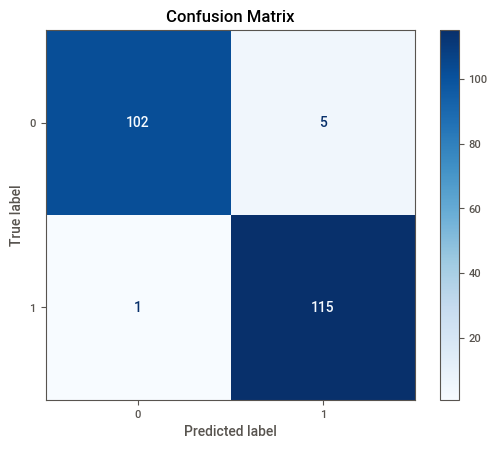

In [79]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_RF)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [80]:
print(classification_report(y_test, y_test_pred_RF))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       107
           1       0.96      0.99      0.97       116

    accuracy                           0.97       223
   macro avg       0.97      0.97      0.97       223
weighted avg       0.97      0.97      0.97       223



In [81]:
# Precision = TP / (TP + FP)
Precision_RF = precision_score(y_test, y_test_pred_RF)
print(f"➤➤➤ Precision Score : {Precision_RF * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_RF = recall_score(y_test, y_test_pred_RF)
print(f"➤➤➤ Recall Score : {Recall_RF * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_RF = f1_score(y_test, y_test_pred_RF)
print(f"➤➤➤ F1 Score : {F1_Score_RF * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_RF = roc_auc_score(y_test, y_test_pred_RF)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_RF * 100 : .2f} %\n")

➤➤➤ Precision Score :  95.83 %

➤➤➤ Recall Score :  99.14 %

➤➤➤ F1 Score :  97.46 %

➤➤➤ ROC_AUC :  97.23 %



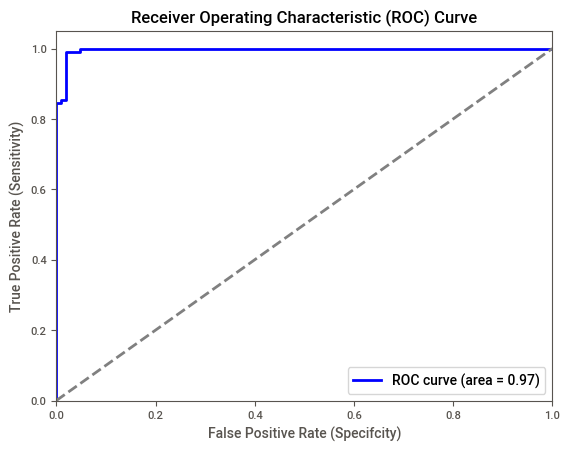

In [82]:
# Compute ROC curve

y_pred_prob = Model_RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_RF:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [83]:
Model_XGB = XGBClassifier(max_depth=3, learning_rate=0.02, n_estimators=50, objective='binary:logistic')
Model_XGB.fit(X_train, y_train)
y_train_pred_XGB = Model_XGB.predict(X_train)
y_test_pred_XGB = Model_XGB.predict(X_test)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_XGB)
Test_Accuracy_XGB = accuracy_score(y_test, y_test_pred_XGB)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_XGB*100:.2f} %")

Training Accuracy: 89.14 %
Testing Accuracy: 88.79 %


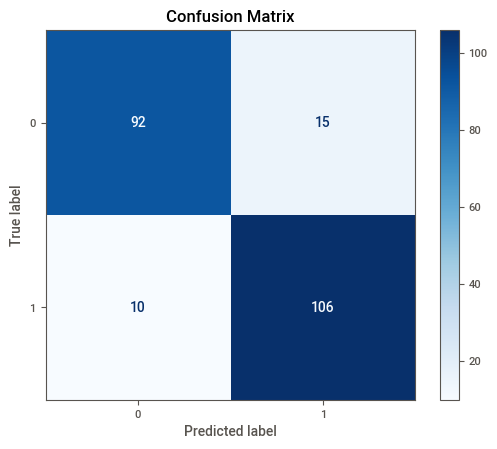

In [84]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_XGB)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [85]:
print(classification_report(y_test, y_test_pred_XGB))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       107
           1       0.88      0.91      0.89       116

    accuracy                           0.89       223
   macro avg       0.89      0.89      0.89       223
weighted avg       0.89      0.89      0.89       223



In [86]:
# Precision = TP / (TP + FP)
Precision_XGB = precision_score(y_test, y_test_pred_XGB)
print(f"➤➤➤ Precision Score : {Precision_XGB * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_XGB = recall_score(y_test, y_test_pred_XGB)
print(f"➤➤➤ Recall Score : {Recall_XGB * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_XGB = f1_score(y_test, y_test_pred_XGB)
print(f"➤➤➤ F1 Score : {F1_Score_XGB * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_XGB = roc_auc_score(y_test, y_test_pred_XGB)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_XGB * 100 : .2f} %\n")

➤➤➤ Precision Score :  87.60 %

➤➤➤ Recall Score :  91.38 %

➤➤➤ F1 Score :  89.45 %

➤➤➤ ROC_AUC :  88.68 %



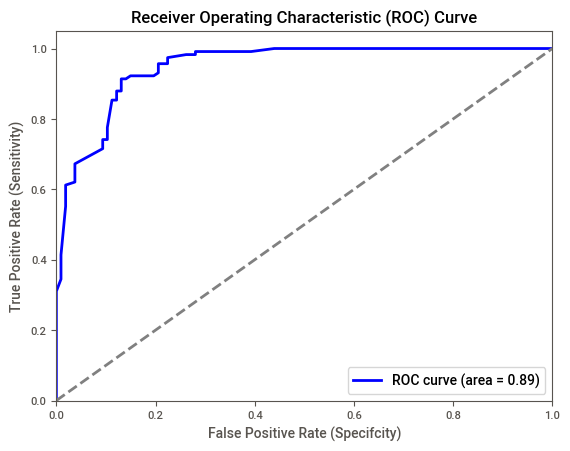

In [87]:
# Compute ROC curve

y_pred_prob = Model_XGB.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_XGB:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [88]:
Model_NB = GaussianNB()
Model_NB.fit(X_train, y_train)
y_train_pred_NB = Model_NB.predict(X_train)
y_test_pred_NB = Model_NB.predict(X_test)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_NB)
Test_Accuracy_NB = accuracy_score(y_test, y_test_pred_NB)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Testing Accuracy: {Test_Accuracy_NB*100:.2f} %")

Training Accuracy: 84.72 %
Testing Accuracy: 85.20 %


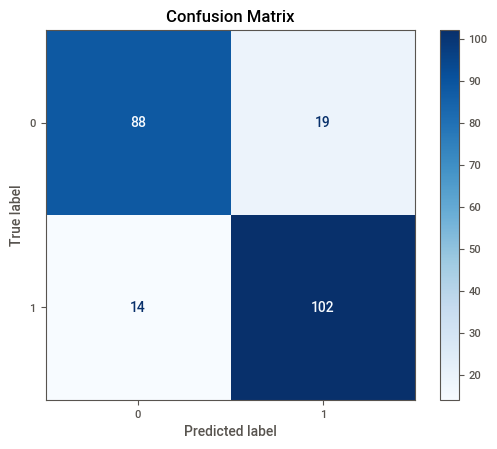

In [89]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["target"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [90]:
print(classification_report(y_test, y_test_pred_NB))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       107
           1       0.84      0.88      0.86       116

    accuracy                           0.85       223
   macro avg       0.85      0.85      0.85       223
weighted avg       0.85      0.85      0.85       223



In [91]:
# Precision = TP / (TP + FP)
Precision_NB = precision_score(y_test, y_test_pred_NB)
print(f"➤➤➤ Precision Score : {Precision_NB * 100 : .2f} %\n")

# Recall/Sensitivity = TP / (TP + FN)
Recall_NB = recall_score(y_test, y_test_pred_NB)
print(f"➤➤➤ Recall Score : {Recall_NB * 100 : .2f} %\n")

# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_NB = f1_score(y_test, y_test_pred_NB)
print(f"➤➤➤ F1 Score : {F1_Score_NB * 100 : .2f} %\n")

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC_AUC_NB = roc_auc_score(y_test, y_test_pred_NB)
print(f"➤➤➤ ROC_AUC : {ROC_AUC_NB * 100 : .2f} %\n")

➤➤➤ Precision Score :  84.30 %

➤➤➤ Recall Score :  87.93 %

➤➤➤ F1 Score :  86.08 %

➤➤➤ ROC_AUC :  85.09 %



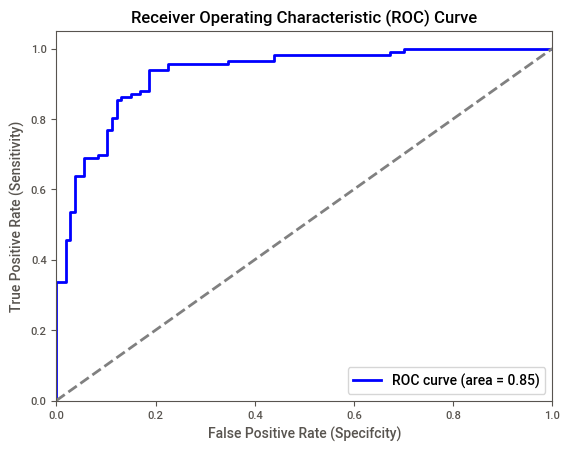

In [92]:
# Compute ROC curve

y_pred_prob = Model_NB.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {ROC_AUC_NB:0.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (Specifcity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [93]:
Models = pd.DataFrame({"Model": ["Logistic Regression","KNN", "SVM", "Decision Trees",
                                 "Random Forests", "XGBoost", "Naive Bayes"],

                       "Score": [(Test_Accuracy_LR * 100), (Test_Accuracy_KNN * 100),
                                 (Test_Accuracy_SVC * 100), (Test_Accuracy_DT * 100),
                                 (Test_Accuracy_RF * 100), (Test_Accuracy_XGB * 100),
                                 (Test_Accuracy_NB * 100)]})

Models.sort_values(by="Score", ascending=False).style.background_gradient(cmap="Blues")

,Model,Score
1,KNN,98.206278
4,Random Forests,97.309417
3,Decision Trees,95.515695
5,XGBoost,88.789238
2,SVM,87.892377
0,Logistic Regression,86.995516
6,Naive Bayes,85.201794


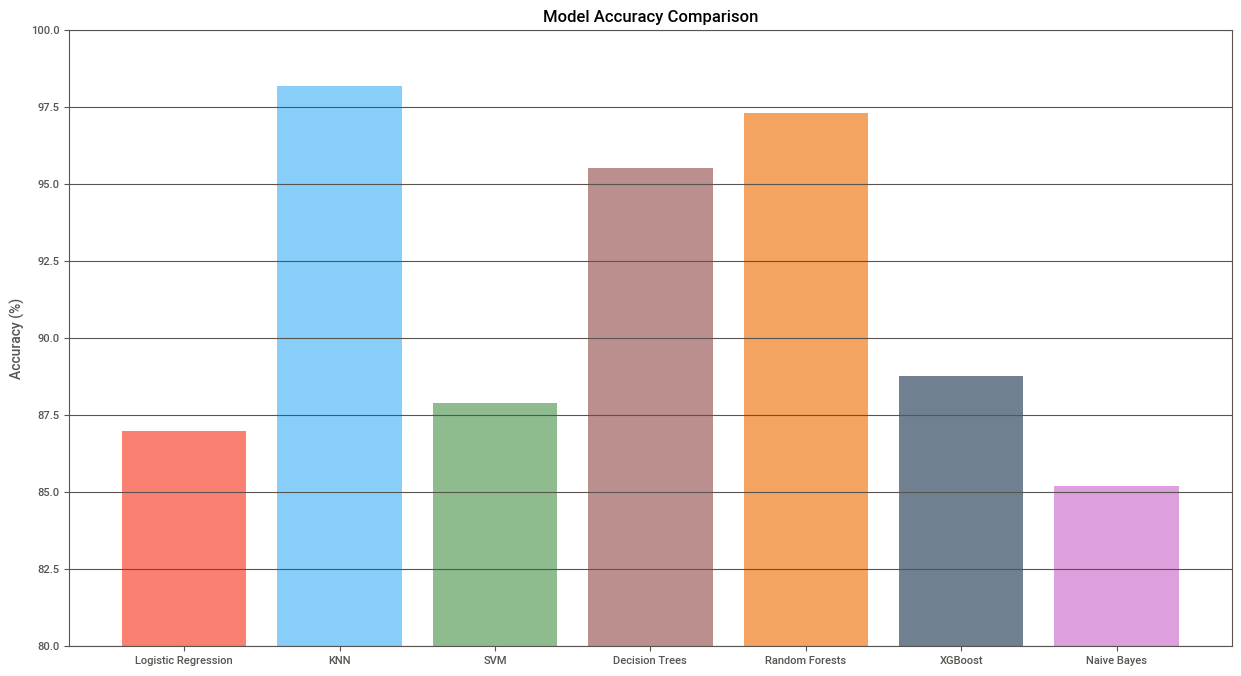

In [94]:
Classifiers = ["Logistic Regression","KNN", "SVM", "Decision Trees", "Random Forests",
               "XGBoost", "Naive Bayes"]

Accuracies = [(Test_Accuracy_LR * 100), (Test_Accuracy_KNN * 100), (Test_Accuracy_SVC * 100),
              (Test_Accuracy_DT * 100),(Test_Accuracy_RF * 100), (Test_Accuracy_XGB * 100),
              (Test_Accuracy_NB * 100)]

plt.figure(figsize=(15, 8))

plt.bar(Classifiers, Accuracies, color=["Salmon", "LightSkyBlue", "DarkSeaGreen",
                                        "RosyBrown", "SandyBrown", "SlateGray", "Plum"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(80, 100)
plt.grid(axis="y", alpha=1)
plt.show()